In [1]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [2]:
from pprint import pprint

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)
bat_df = pd.read_csv("../Data/Corpus_csv/batters_ten_season.csv")

In [4]:
bat_df.head()

,Id,Name,Active,First year,Last year,Url,Country,Bat hand,Throw hand,Full Name,HoF,HoF type,HoF year,HoF comittee,Player type,retirement_age,total_seasons,career_teams,career_leagues,first_position,second_position,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,ten_season_age,2B_bt,3B_bt,AB_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,PA_bt,RBI_bt,R_bt,SB_bt,HBP_bt,SF_bt,SH_bt,SO_bt,BA_bt,OBP_bt,OPS_bt,SLG_bt,TB_bt,A_fd,CG_fd,CS_fd,DP_fd,E_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,SB_fd,WP_fd,Ch_fd,Fld%_fd
0,Alan_Ashby_602,Alan Ashby,False,1973,1989,https://www.baseball-reference.com//players/a/...,us,Both,Right,Alan Dean Ashby,0,-,-,-,2,37,17,"['CLE', 'TOR', 'HOU']","['AL', 'NL']",C,-,1,0,0,1970,1980,30.0,108.0,11.0,2479.0,261.0,9.0,812.0,42.0,588.0,44.0,2813.0,290.0,230.0,6.0,7.0,18.0,46.0,383.0,0.237,0.310,0.753,0.443,1005.0,434.0,645.0,292.0,57.0,68.0,738.0,800.0,6530.2,60.0,4121.0,595.0,213.0,4623.0,0.985
1,Alex_Arias_531,Alex Arias,False,1992,2002,https://www.baseball-reference.com//players/a/...,us,Right,Right,Alejandro Arias,0,-,-,-,2,34,11,"['CHC', 'FLA', 'PHI', 'SDP', 'NYY']","['NL', 'AL']",SS,3B,1,0,0,1990,2000,33.0,84.0,6.0,1766.0,180.0,5.0,769.0,18.0,470.0,14.0,2002.0,196.0,203.0,10.0,23.0,16.0,17.0,209.0,0.266,0.339,0.772,0.433,728.0,1016.0,320.0,0.0,183.0,46.0,398.0,580.0,3761.0,0.0,645.0,0.0,0.0,1707.0,0.973
2,Alex_Avila_677,Alex Avila,False,2009,2021,https://www.baseball-reference.com//players/a/...,us,Left,Right,Alexander Thomas Avila,0,-,-,-,2,34,13,"['DET', 'CHW', 'ARI', 'MIN', 'WSN']","['AL', 'NL']",C,1B,1,0,0,2000,2020,31.0,136.0,8.0,2758.0,462.0,8.0,932.0,94.0,654.0,16.0,3264.0,362.0,319.0,7.0,14.0,20.0,10.0,941.0,0.237,0.347,0.921,0.574,1326.0,376.0,693.0,193.0,77.0,34.0,804.0,891.0,7042.1,53.0,6093.0,467.0,274.0,6503.0,0.995
3,Henry_Aaron_2,Henry Aaron,False,1954,1976,https://www.baseball-reference.com//players/a/...,us,Right,Right,Henry Louis Aaron,1,Player,1982,BBWAA,2,42,23,"['MLN', 'ATL', 'MIL']","['NL', 'AL']",OF,RF,1,0,0,1950,1970,29.0,321.0,77.0,5940.0,541.0,37.0,1511.0,342.0,1898.0,124.0,6582.0,1121.0,1077.0,103.0,20.0,62.0,19.0,609.0,0.320,0.375,1.206,0.831,4139.0,318.0,2831.0,0.0,63.0,147.0,2957.0,3008.0,26416.1,0.0,6094.0,0.0,0.0,6559.0,0.978
4,Luis_Aguayo_137,Luis Aguayo,False,1980,1989,https://www.baseball-reference.com//players/a/...,pr,Right,Right,Luis Aguayo,0,-,-,-,2,30,10,"['PHI', 'CLE']","['NL', 'AL']",SS,3B,1,0,0,1980,1980,30.0,43.0,10.0,1104.0,94.0,5.0,568.0,37.0,260.0,12.0,1244.0,109.0,142.0,7.0,20.0,12.0,14.0,220.0,0.236,0.304,0.852,0.548,524.0,867.0,183.0,0.0,148.0,54.0,268.0,505.0,2727.0,0.0,483.0,0.0,0.0,1404.0,0.962


In [5]:
bat_df["ten_season_age"].value_counts()

32.0           434
31.0           407
33.0           365
30.0           343
29.0           206
34.0           206
35.0           113
28.0            93
36.0            62
37.0            33
27.0            28
38.0            16
26.0             9
39.0             8
40.0             5
46.0             2
desconocido      2
43.0             2
44.0             1
45.0             1
48.0             1
42.0             1
41.0             1
Name: ten_season_age, dtype: int64

In [6]:
bat_df.shape

(2339, 63)

In [7]:
from Preprocessing.data_frame_procces import filter_dataset, select_features

In [8]:
bat_df['retirement_age'] = (
        bat_df['retirement_age'].replace('desconocido', bat_df['retirement_age'].mode()[0])
    )
bat_df['retirement_age'] = bat_df['retirement_age'].astype('int64')

bat_df['ten_season_age'] = (
        bat_df['ten_season_age'].replace('desconocido', bat_df['ten_season_age'].mode()[0])
    )
bat_df['ten_season_age'] = bat_df['ten_season_age'].astype('float64').round(0).astype('int64')


In [9]:
eq_conditions = {
    "HoF type":['-','Player']
}
filter_df = filter_dataset(bat_df, eq_conditions,None, None, None)

In [10]:
filter_df.shape

(2323, 63)

In [11]:
filter_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,ten_season_age,2B_bt,3B_bt,AB_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,PA_bt,RBI_bt,R_bt,SB_bt,HBP_bt,SF_bt,SH_bt,SO_bt,BA_bt,OBP_bt,OPS_bt,SLG_bt,TB_bt,A_fd,CG_fd,CS_fd,DP_fd,E_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,SB_fd,WP_fd,Ch_fd,Fld%_fd
count,2323.000000,2323.000000,2323.000000,2323.0,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000
mean,1958.839862,1972.056823,0.077486,2.0,35.421007,13.387861,0.960396,0.058545,0.001291,1954.571675,1967.610848,31.813603,159.695652,33.076625,3336.929402,321.256565,27.808868,973.239346,77.636677,916.003444,23.021524,3742.923375,428.077486,475.545846,78.337925,25.491175,17.986655,39.504950,439.698666,0.269850,0.335452,0.852693,0.517242,1645.171330,1063.064572,938.322428,41.339647,245.365476,122.275936,1083.267327,1264.527766,9502.999656,12.347826,3391.827378,69.048214,23.942316,4577.167886,0.969859
std,37.834483,37.174429,0.267419,0.0,3.302718,3.070205,0.195069,0.234822,0.035921,37.872177,37.466265,2.335943,76.793659,26.829047,1280.943810,181.765359,26.547190,295.382176,71.504086,393.101058,25.906751,1447.617201,220.389867,232.865842,91.430411,23.171779,17.404106,42.419507,278.248807,0.027169,0.033499,0.151079,0.131638,775.747946,1176.106946,652.955296,114.049166,281.307562,103.864937,688.458134,631.267366,4920.690841,39.999144,2415.215762,171.278456,65.707310,2410.880979,0.024534
min,1871.000000,1882.000000,0.000000,2.0,27.000000,10.000000,0.000000,0.000000,0.000000,1870.000000,1880.000000,26.000000,6.000000,0.000000,204.000000,9.000000,0.000000,73.000000,0.000000,48.000000,0.000000,222.000000,21.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161000,0.195000,0.403000,0.208000,67.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,71.000000,255.100000,0.000000,57.000000,0.000000,0.000000,130.000000,0.815000
25%,1929.000000,1945.000000,0.000000,2.0,33.000000,11.000000,1.000000,0.000000,0.000000,1920.000000,1940.000000,30.000000,101.000000,13.000000,2367.000000,185.000000,7.000000,793.000000,22.000000,610.000000,2.000000,2646.500000,261.000000,292.500000,17.000000,11.000000,0.000000,10.000000,235.500000,0.252500,0.315000,0.743000,0.416000,1028.500000,180.000000,453.500000,0.000000,38.000000,56.000000,593.500000,824.000000,6166.000000,0.000000,1653.000000,0.000000,0.000000,3011.000000,0.963000
50%,1967.000000,1980.000000,0.000000,2.0,35.000000,13.000000,1.000000,0.000000,0.000000,1960.000000,1980.000000,32.000000,156.000000,26.000000,3479.000000,291.000000,21.000000,1019.000000,54.000000,932.000000,16.000000,3889.000000,402.000000,467.000000,44.000000,19.000000,16.000000,26.000000,396.000000,0.268000,0.333000,0.842000,0.501000,1646.000000,477.000000,895.000000,0.000000,98.000000,93.000000,1045.000000,1158.000000,9065.000000,0.000000,2801.000000,0.000000,0.000000,4289.000000,0.976000
75%,1991.000000,2004.000000,0.000000,2.0,37.000000,15.000000,1.000000,0.000000,0.000000,1990.000000,2000.000000,33.000000,214.000000,45.000000,4341.000000,430.000000,41.000000,1198.500000,113.000000,1207.000000,34.000000,4886.000000,564.500000,636.000000,107.000000,34.000000,31.000000,53.000000,609.000000,0.285000,0.356000,0.948000,0.604000,2178.000000,1783.500000,1281.000000,0.000000,381.500000,151.000000,1432.500000,1595.000000,11518.100000,0.000000,4462.500000,0.000000,0.000000,5794.000000,0.986000
max,2013.000000,2022.000000,1.000000,2.0,58.000000,27.000000,1.000000,1.000000,1.0

In [12]:
data_set_bat_header = ["2B_bt","3B_bt","AB_bt","BB_bt","CS_bt","G_bt","HR_bt","H_bt","IBB_bt","PA_bt","RBI_bt","R_bt","SB_bt","HBP_bt","SF_bt","SH_bt","SO_bt","BA_bt","OBP_bt","OPS_bt","SLG_bt","TB_bt","A_fd","CG_fd","CS_fd","DP_fd","E_fd","GS_fd","G_fd","Inn_fd","PB_fd","PO_fd","SB_fd","WP_fd","Ch_fd","Fld%_fd"]
for h in data_set_bat_header:
    nan = filter_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{filter_df[h].isna().sum()}")

In [13]:
print(filter_df['HoF'].value_counts())

0    2143
1     180
Name: HoF, dtype: int64


In [14]:
inactives_cond = {"Active":[False]}
inactive_bat_df = filter_dataset(filter_df, inactives_cond, None, None, None) 

In [15]:
inactive_bat_df.shape

(2233, 63)

In [16]:
negro_league_condition = {
    'play_in_negro_league':[1]
}
negro_lg_bat_df = filter_dataset(filter_df, negro_league_condition, None, None, None)

In [17]:
negro_lg_bat_df.shape

(136, 63)

In [18]:
negro_lg_bat_df['HoF'].value_counts()

0    117
1     19
Name: HoF, dtype: int64

In [19]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
mayors_lg_bat_df = filter_dataset(filter_df, mayor_league_condition, None, None, None)

In [20]:
mayors_lg_bat_df.shape

(2231, 63)

In [21]:
drop_recent_election_cond = {
    'retirament_decade':2009
}
inactive_mayors_lg_bat_df = filter_dataset(inactive_bat_df, mayor_league_condition, None, drop_recent_election_cond, None)

In [23]:
inactive_mayors_lg_bat_df.reset_index(drop=True, inplace=True)

In [24]:
from Preprocessing.data_frame_procces import separete_steroids_players

inactive_mayors_lg_bat_df, steroids_p_df = separete_steroids_players(inactive_mayors_lg_bat_df)

In [25]:
inactive_mayors_lg_bat_df.shape

(1779, 63)

In [26]:
inactive_mayors_lg_bat_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,ten_season_age,2B_bt,3B_bt,AB_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,PA_bt,RBI_bt,R_bt,SB_bt,HBP_bt,SF_bt,SH_bt,SO_bt,BA_bt,OBP_bt,OPS_bt,SLG_bt,TB_bt,A_fd,CG_fd,CS_fd,DP_fd,E_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,SB_fd,WP_fd,Ch_fd,Fld%_fd
count,1779.000000,1779.000000,1779.000000,1779.0,1779.000000,1779.000000,1779.0,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,1949.175379,1962.539629,0.091062,2.0,35.383924,13.525014,1.0,0.024733,0.001686,1944.822934,1957.886453,31.633502,155.569421,36.519955,3376.085441,322.826869,29.416526,986.448567,69.622822,927.725126,22.783586,3784.955593,425.129848,478.324340,81.622822,23.175942,16.039910,44.681844,397.681844,0.269908,0.334884,0.833315,0.498431,1626.915121,1106.914559,957.676223,46.851602,247.577291,138.566610,1090.998876,1282.977515,9528.453626,14.030916,3456.137156,72.099494,21.572232,4701.618325,0.967412
std,34.598609,34.171324,0.287779,0.0,3.251095,3.130786,0.0,0.155354,0.041042,34.657404,34.147607,2.237708,72.593418,28.280056,1238.147877,179.549374,27.222021,276.082632,66.305400,385.716957,24.712426,1401.358344,216.087720,233.387351,95.412242,21.231250,17.172095,45.274900,229.490841,0.026621,0.033403,0.144684,0.125072,743.423584,1199.065675,651.890914,125.146539,277.693894,111.632696,688.401110,618.725493,4655.774840,44.619749,2401.202572,179.093005,59.401105,2395.007751,0.025882
min,1871.000000,1882.000000,0.000000,2.0,27.000000,10.000000,1.0,0.000000,0.000000,1870.000000,1880.000000,26.000000,6.000000,0.000000,252.000000,10.000000,0.000000,140.000000,0.000000,48.000000,0.000000,276.000000,21.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161000,0.195000,0.403000,0.208000,67.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,135.000000,599.000000,0.000000,80.000000,0.000000,0.000000,201.000000,0.815000
25%,1923.000000,1937.000000,0.000000,2.0,33.000000,11.000000,1.0,0.000000,0.000000,1920.000000,1930.000000,30.000000,100.500000,15.000000,2460.000000,188.000000,8.000000,815.500000,20.000000,627.000000,1.000000,2723.500000,263.000000,293.500000,18.000000,10.000000,0.000000,13.000000,229.000000,0.253000,0.314000,0.727500,0.403000,1037.500000,199.000000,472.000000,0.000000,42.000000,66.000000,611.000000,842.500000,6312.500000,0.000000,1775.500000,0.000000,0.000000,3152.000000,0.961000
50%,1958.000000,1971.000000,0.000000,2.0,35.000000,13.000000,1.0,0.000000,0.000000,1950.000000,1970.000000,32.000000,151.000000,29.000000,3514.000000,293.000000,23.000000,1024.000000,46.000000,943.000000,17.000000,3918.000000,394.000000,468.000000,45.000000,18.000000,12.000000,31.000000,365.000000,0.268000,0.333000,0.820000,0.482000,1611.000000,511.000000,907.000000,0.000000,106.000000,107.000000,1049.000000,1166.000000,9108.200000,0.000000,2862.000000,0.000000,0.000000,4396.000000,0.974000
75%,1978.000000,1991.000000,0.000000,2.0,37.000000,15.000000,1.0,0.000000,0.000000,1970.000000,1990.000000,33.000000,206.000000,50.000000,4341.000000,428.000000,44.000000,1198.000000,99.000000,1211.500000,34.000000,4886.000000,557.500000,634.000000,112.000000,30.000000,28.000000,60.000000,528.000000,0.285000,0.356000,0.927500,0.579000,2131.000000,1878.500000,1299.000000,0.000000,384.000000,170.500000,1446.000000,1617.500000,11472.600000,0.000000,4442.500000,0.000000,0.000000,5873.000000,0.984000
max,2000.000000,2009.000000,1.000000,2.0,58.000000,27.000000,1.0,1.000000,1.000000,2000.000000,2000.000000,43.000

In [27]:
features =  ['ten_season_age','debut_decade']+data_set_bat_header 
target = ['HoF']

In [28]:
features

['ten_season_age',
 'debut_decade',
 '2B_bt',
 '3B_bt',
 'AB_bt',
 'BB_bt',
 'CS_bt',
 'G_bt',
 'HR_bt',
 'H_bt',
 'IBB_bt',
 'PA_bt',
 'RBI_bt',
 'R_bt',
 'SB_bt',
 'HBP_bt',
 'SF_bt',
 'SH_bt',
 'SO_bt',
 'BA_bt',
 'OBP_bt',
 'OPS_bt',
 'SLG_bt',
 'TB_bt',
 'A_fd',
 'CG_fd',
 'CS_fd',
 'DP_fd',
 'E_fd',
 'GS_fd',
 'G_fd',
 'Inn_fd',
 'PB_fd',
 'PO_fd',
 'SB_fd',
 'WP_fd',
 'Ch_fd',
 'Fld%_fd']

In [29]:
X = select_features(inactive_mayors_lg_bat_df, features+target)
X

,ten_season_age,debut_decade,2B_bt,3B_bt,AB_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,PA_bt,RBI_bt,R_bt,SB_bt,HBP_bt,SF_bt,SH_bt,SO_bt,BA_bt,OBP_bt,OPS_bt,SLG_bt,TB_bt,A_fd,CG_fd,CS_fd,DP_fd,E_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,SB_fd,WP_fd,Ch_fd,Fld%_fd,HoF
0,30,1970,108.0,11.0,2479.0,261.0,9.0,812.0,42.0,588.0,44.0,2813.0,290.0,230.0,6.0,7.0,18.0,46.0,383.0,0.237,0.310,0.753,0.443,1005.0,434.0,645.0,292.0,57.0,68.0,738.0,800.0,6530.2,60.0,4121.0,595.0,213.0,4623.0,0.985,0
1,33,1990,84.0,6.0,1766.0,180.0,5.0,769.0,18.0,470.0,14.0,2002.0,196.0,203.0,10.0,23.0,16.0,17.0,209.0,0.266,0.339,0.772,0.433,728.0,1016.0,320.0,0.0,183.0,46.0,398.0,580.0,3761.0,0.0,645.0,0.0,0.0,1707.0,0.973,0
2,29,1950,321.0,77.0,5940.0,541.0,37.0,1511.0,342.0,1898.0,124.0,6582.0,1121.0,1077.0,103.0,20.0,62.0,19.0,609.0,0.320,0.375,1.206,0.831,4139.0,318.0,2831.0,0.0,63.0,147.0,2957.0,3008.0,26416.1,0.0,6094.0,0.0,0.0,6559.0,0.978,1
3,30,1980,43.0,10.0,1104.0,94.0,5.0,568.0,37.0,260.0,12.0,1244.0,109.0,142.0,7.0,20.0,12.0,14.0,220.0,0.236,0.304,0.852,0.548,524.0,867.0,183.0,0.0,148.0,54.0,268.0,505.0,2727.0,0.0,483.0,0.0,0.0,1404.0,0.962,0
4,33,1980,140.0,39.0,2807.0,386.0,38.0,995.0,36.0,712.0,24.0,3304.0,304.0,394.0,70.0,38.0,37.0,36.0,459.0,0.254,0.348,0.791,0.443,1253.0,2174.0,666.0,0.0,474.0,102.0,740.0,875.0,6671.1,0.0,1590.0,0.0,0.0,3866.0,0.974,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,35,1940,155.0,22.0,3999.0,376.0,7.0,1174.0,230.0,1063.0,39.0,4421.0,750.0,561.0,15.0,24.0,18.0,3.0,728.0,0.266,0.331,1.077,0.746,2359.0,159.0,1742.0,0.0,28.0,143.0,1990.0,2014.0,17062.2,0.0,4159.0,0.0,0.0,4461.0,0.968,0
1803,29,1900,214.0,80.0,3812.0,192.0,52.0,1062.0,48.0,1153.0,0.0,4146.0,585.0,535.0,140.0,31.0,0.0,107.0,336.0,0.302,0.341,0.844,0.503,2013.0,2107.0,912.0,0.0,222.0,310.0,972.0,1018.0,8566.0,0.0,1818.0,0.0,0.0,4235.0,0.927,0
1804,31,1970,193.0,24.0,3999.0,426.0,12.0,1138.0,158.0,1150.0,42.0,4475.0,651.0,548.0,6.0,8.0,35.0,7.0,697.0,0.288,0.355,1.016,0.661,2240.0,137.0,1500.0,0.0,41.0,66.0,1916.0,1990.0,15372.2,0.0,3365.0,0.0,0.0,3568.0,0.982,0
1805,32,1980,246.0,16.0,4757.0,598.0,44.0,1317.0,159.0,1258.0,33.0,5441.0,707.0,642.0,46.0,25.0,55.0,6.0,769.0,0.264,0.346,0.948,0.602,2434.0,2104.0,1195.0,45.0,248.0,188.0,1274.0,1303.0,11237.0,15.0,2020.0,110.0,38.0,4312.0,0.956,0


In [30]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

In [ ]:
from Models.functions.stats_bar import stats_bar_plot

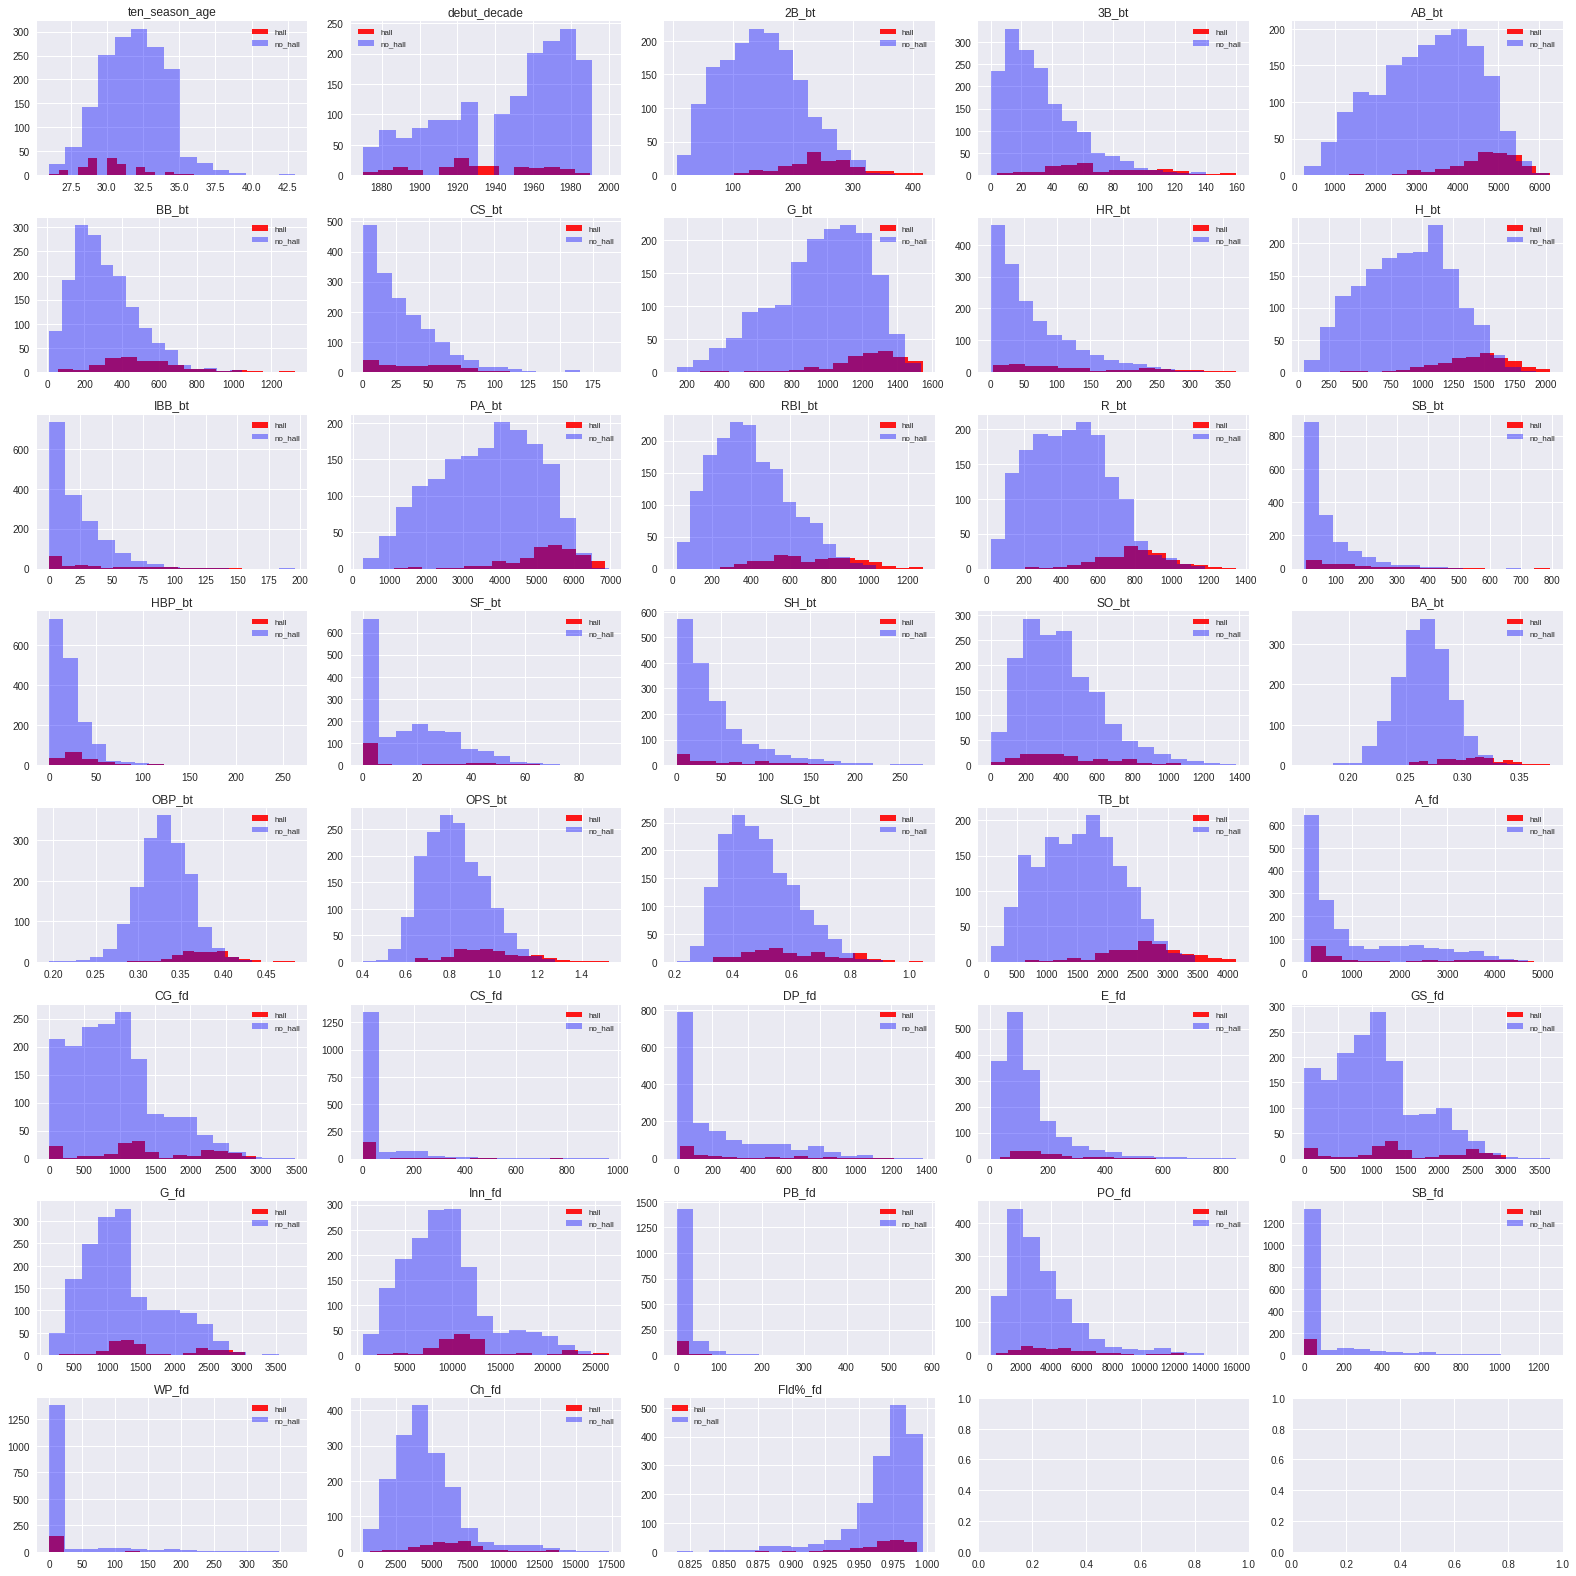

In [ ]:
stats_bar_plot(hall, no_hall, features, 8,5,(22,22))

In [31]:
def boxplot_generate(hall, no_hall, feature):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
    ax1.set_title("Hall")
    ax2.set_title("NoHall")
    hall.boxplot(feature, ax=ax1)
    no_hall.boxplot(feature, ax=ax2)
    plt.show()

def boxplot_per_feature(hall, no_hall, features):
    for feature in features:
        boxplot_generate(hall, no_hall, feature)

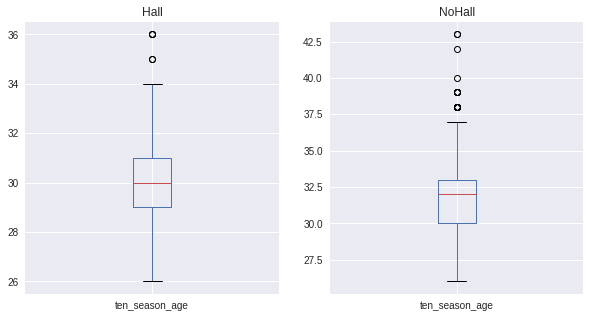

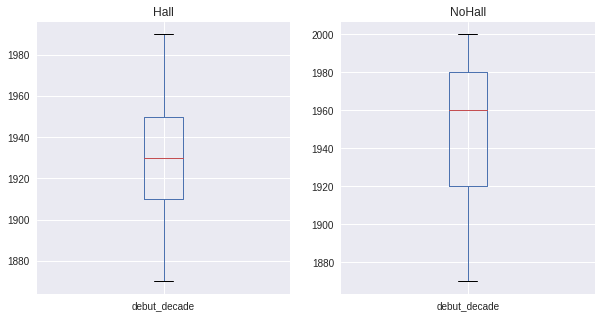

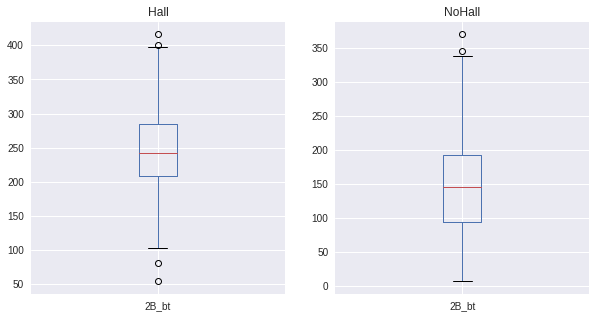

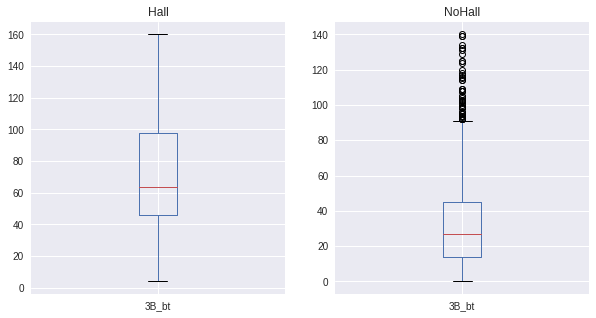

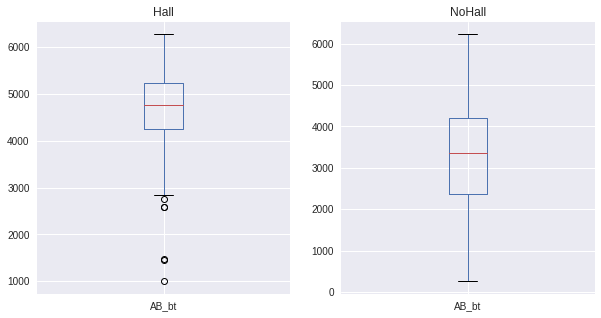

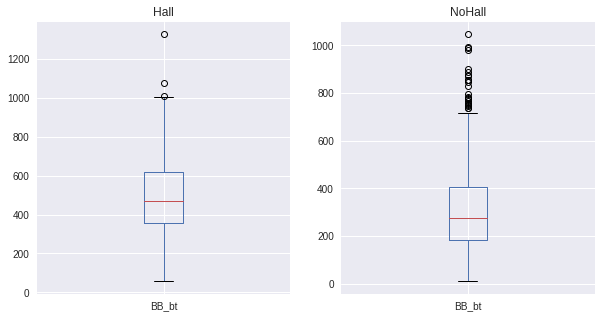

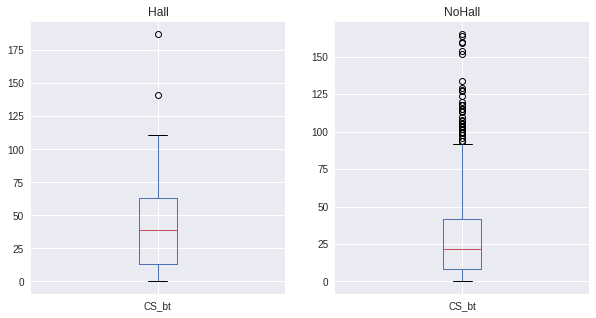

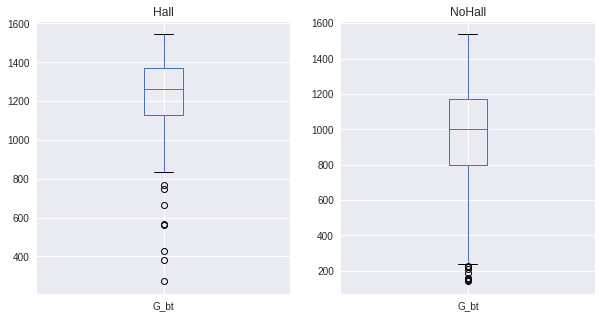

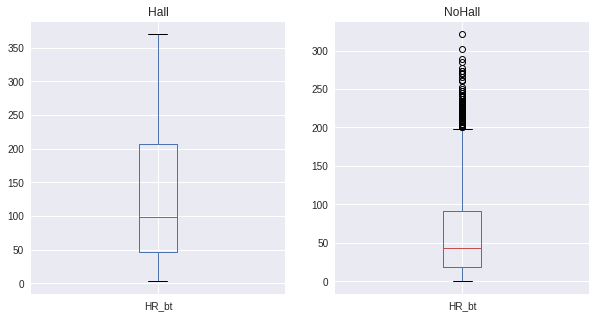

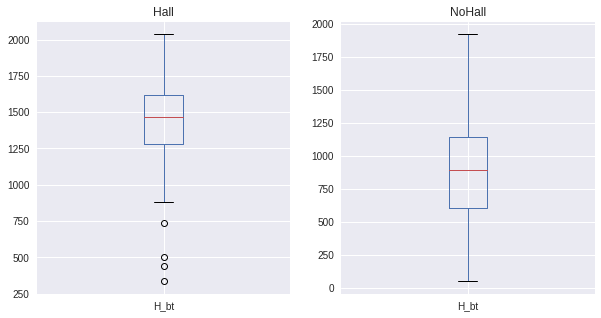

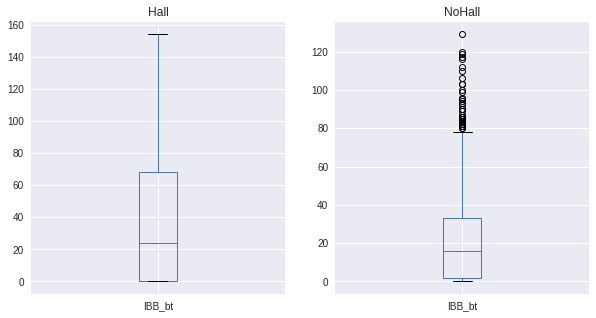

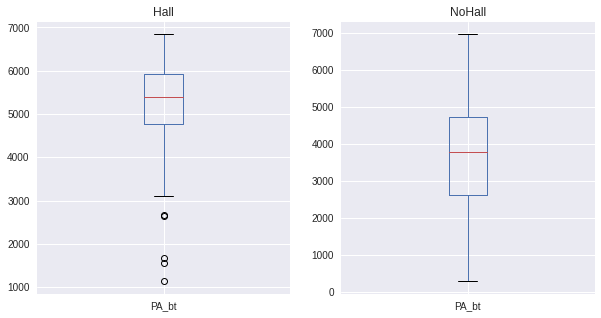

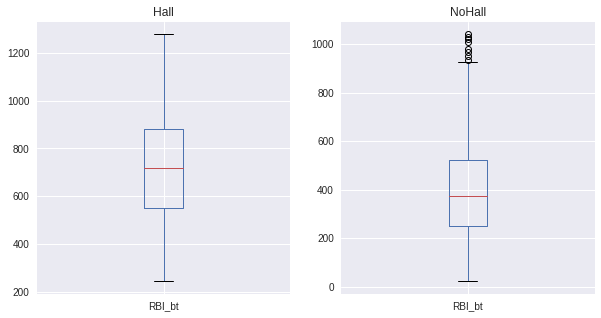

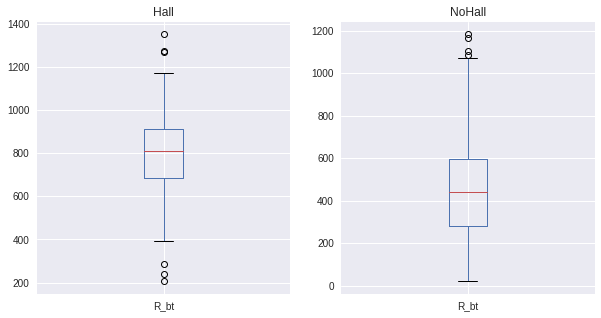

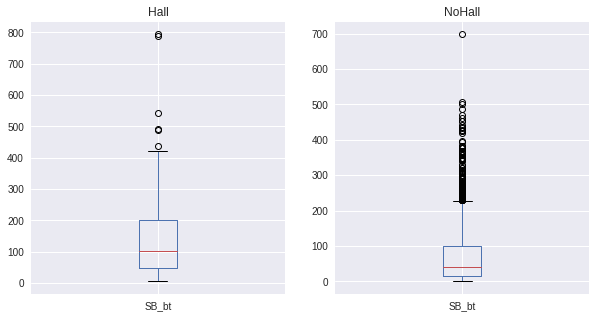

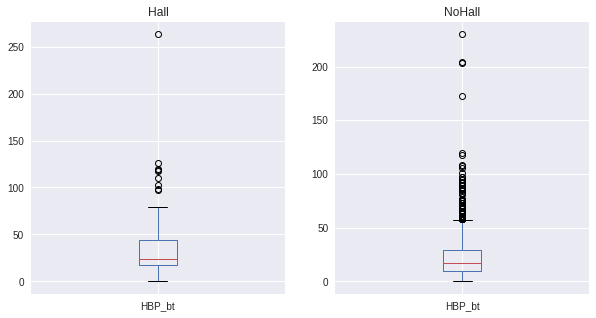

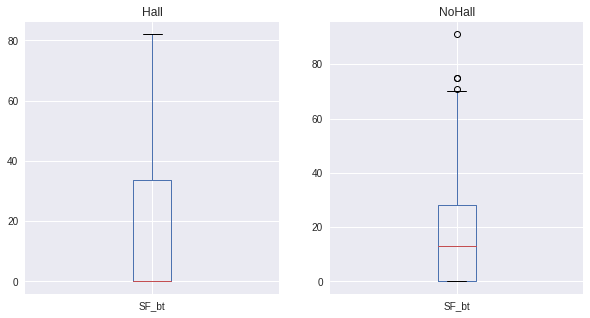

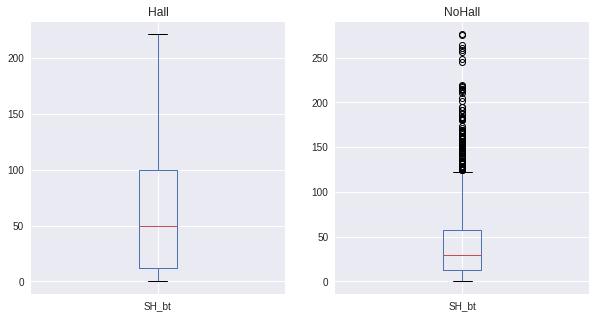

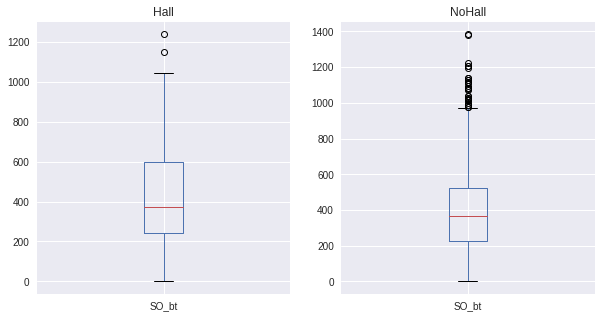

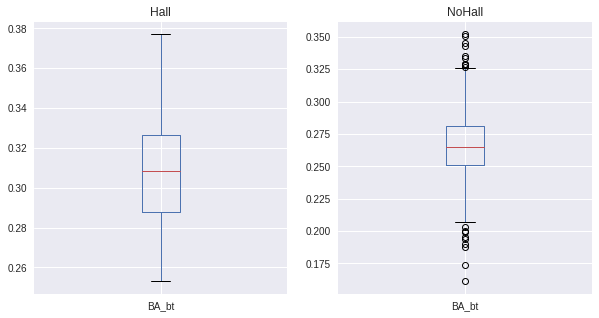

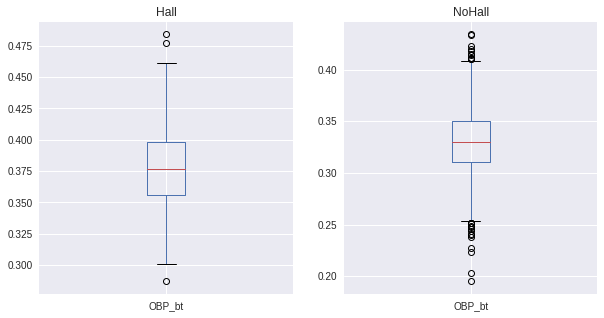

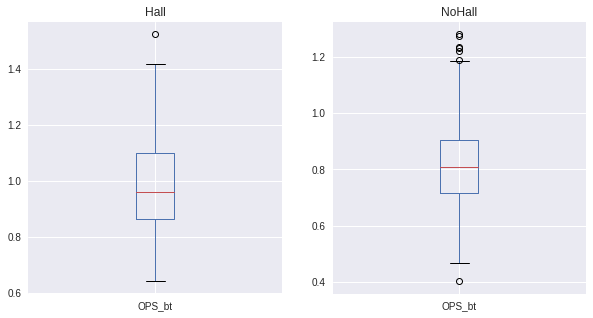

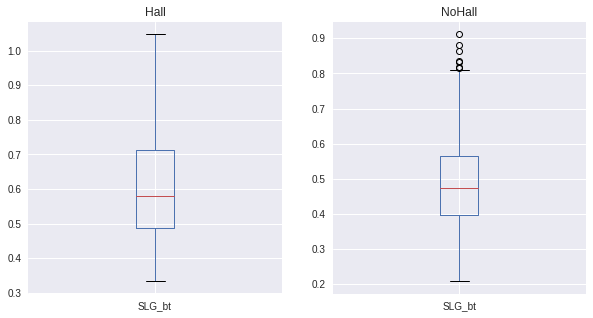

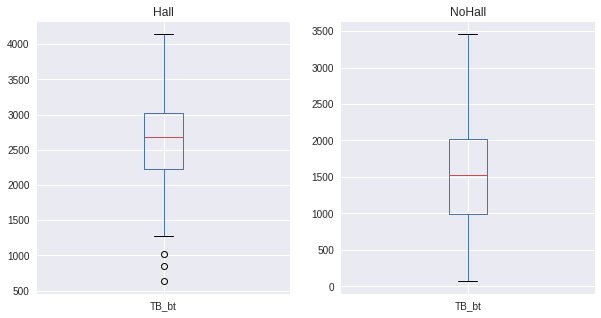

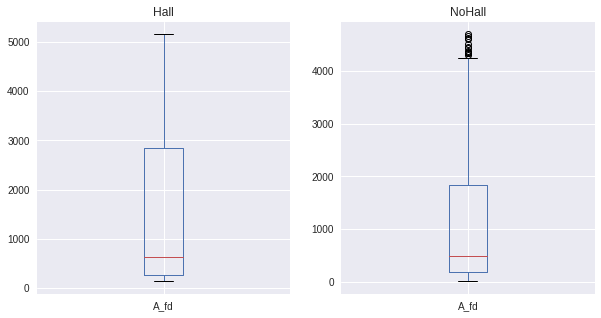

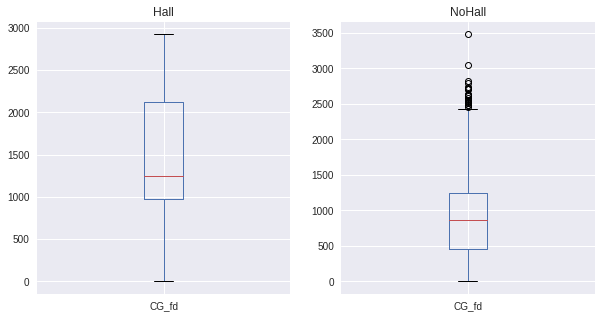

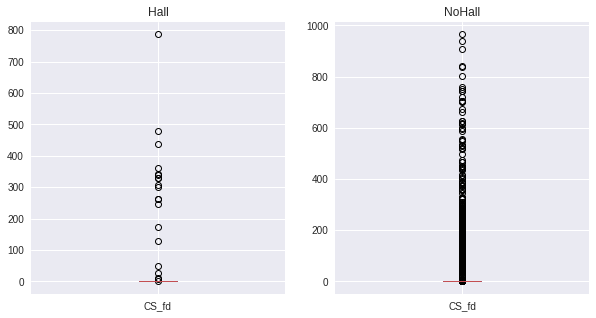

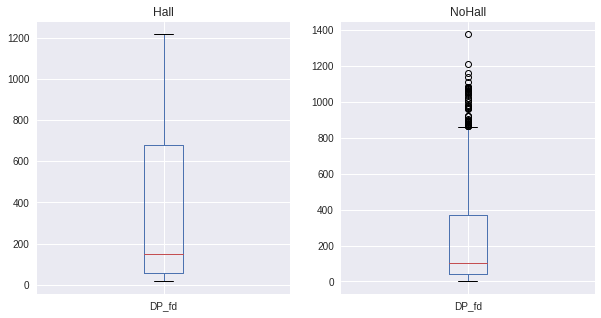

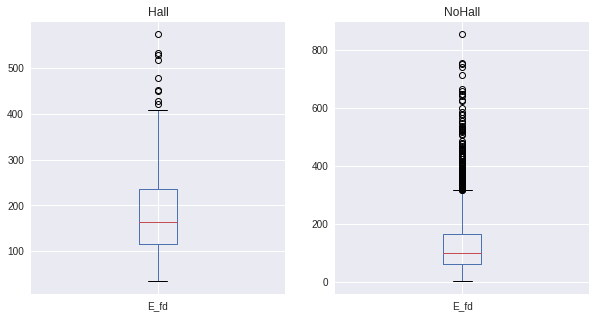

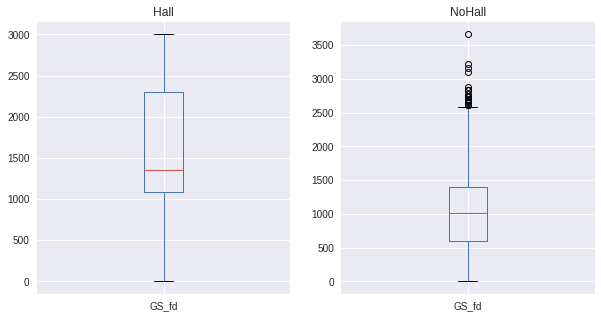

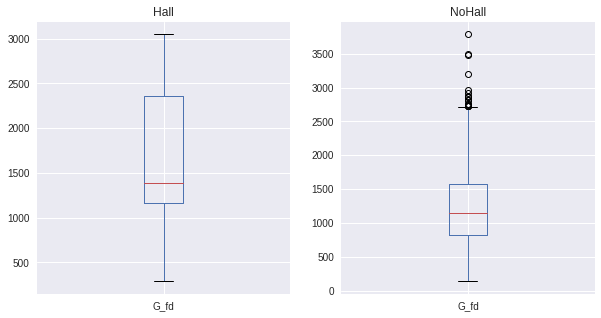

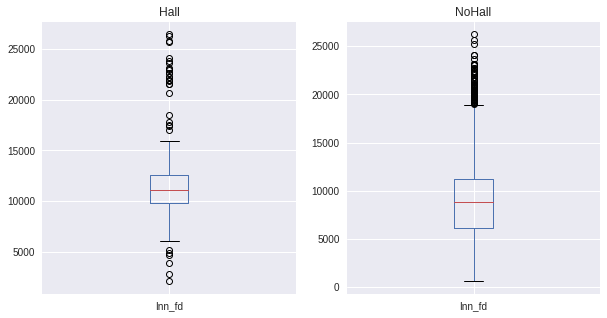

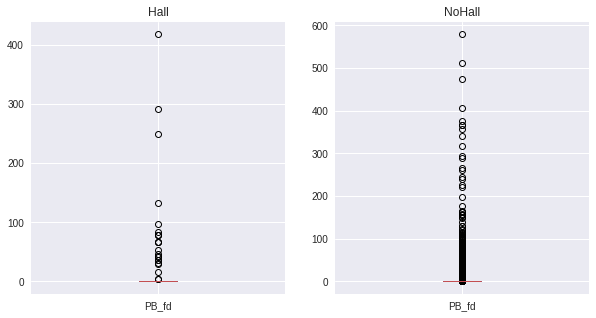

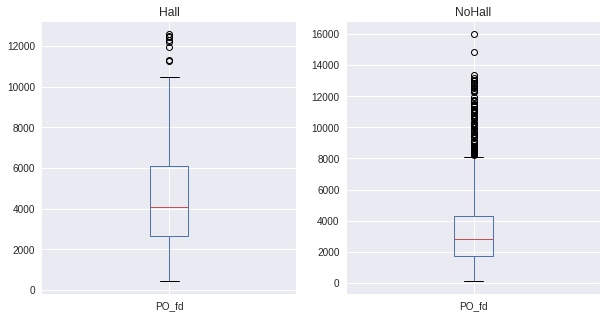

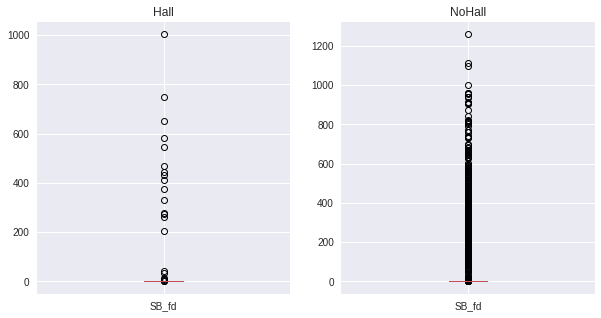

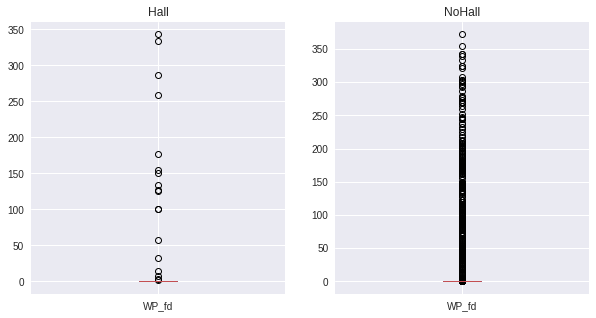

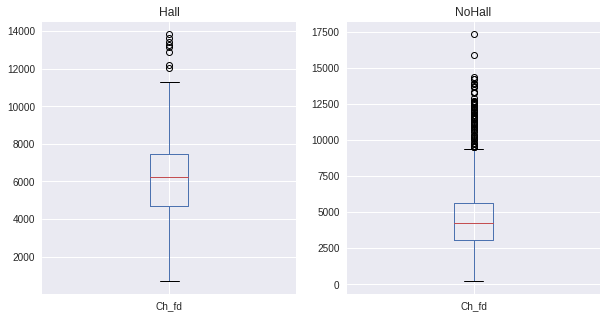

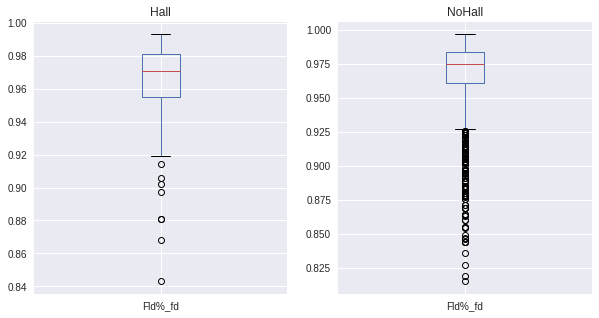

In [32]:
boxplot_per_feature(hall, no_hall, features)

Vamos a poner un threshold en 2000 PA 

In [33]:
gt_cond = {
    "PA_bt":1999
}
inactive_mayors_lg_bat_df = filter_dataset(inactive_mayors_lg_bat_df, None, gt_cond, None, None)

In [34]:
inactive_mayors_lg_bat_df.shape

(1542, 63)

In [ ]:
inactive_mayors_lg_bat_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,ten_season_age,2B_bt,3B_bt,AB_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,PA_bt,RBI_bt,R_bt,SB_bt,HBP_bt,SF_bt,SH_bt,SO_bt,BA_bt,OBP_bt,OPS_bt,SLG_bt,TB_bt,A_fd,CG_fd,CS_fd,DP_fd,E_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,SB_fd,WP_fd,Ch_fd,Fld%_fd
count,1565.000000,1565.000000,1565.000000,1565.0,1565.000000,1565.000000,1565.0,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,1948.434505,1961.936741,0.101597,2.0,35.507987,13.766134,1.0,0.008307,0.001278,1944.076677,1957.252396,31.507348,171.736102,40.299042,3698.964856,355.306709,32.790415,1059.667732,78.274760,1021.323962,25.217252,4148.148882,469.750799,529.423003,91.489457,25.738019,17.742492,48.078594,435.829393,0.273069,0.338250,0.847452,0.509203,1798.792332,1214.185304,1063.424920,44.494569,274.787859,151.460064,1201.349521,1396.375080,10446.093291,13.481789,3761.578275,66.722684,19.591054,5127.223642,0.966942
std,35.314268,34.982977,0.302215,0.0,3.214532,3.150773,0.0,0.090791,0.035737,35.376951,34.927632,2.168592,64.596347,28.045337,988.359148,171.703215,27.630685,211.780537,68.633017,324.652983,26.104748,1126.404289,199.228427,208.256558,98.453272,22.103693,17.955672,46.927458,225.203675,0.025204,0.032474,0.145948,0.127530,652.672459,1237.335457,633.230131,129.062068,288.150897,112.216625,671.651818,580.379715,4308.880614,46.261715,2425.852349,182.814522,60.451161,2269.860511,0.026240
min,1871.000000,1882.000000,0.000000,2.0,28.000000,10.000000,1.0,0.000000,0.000000,1870.000000,1880.000000,26.000000,36.000000,2.000000,1635.000000,23.000000,0.000000,425.000000,0.000000,367.000000,0.000000,2002.000000,111.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174000,0.195000,0.403000,0.208000,506.000000,28.000000,0.000000,0.000000,4.000000,13.000000,0.000000,445.000000,983.200000,0.000000,427.000000,0.000000,0.000000,1043.000000,0.819000
25%,1921.000000,1934.000000,0.000000,2.0,33.000000,11.000000,1.0,0.000000,0.000000,1920.000000,1930.000000,30.000000,122.000000,19.000000,2912.000000,229.000000,12.000000,906.000000,26.000000,756.000000,2.000000,3234.000000,316.000000,364.000000,24.000000,12.000000,0.000000,14.000000,266.000000,0.257000,0.318000,0.744000,0.409000,1294.000000,222.000000,661.000000,0.000000,48.000000,78.000000,783.000000,973.000000,7503.000000,0.000000,1987.000000,0.000000,0.000000,3642.000000,0.960000
50%,1957.000000,1970.000000,0.000000,2.0,35.000000,13.000000,1.0,0.000000,0.000000,1950.000000,1970.000000,31.000000,165.000000,34.000000,3753.000000,329.000000,27.000000,1072.000000,58.000000,1023.000000,19.000000,4196.000000,434.000000,513.000000,55.000000,20.000000,17.000000,34.000000,399.000000,0.271000,0.337000,0.835000,0.492000,1758.000000,602.000000,1009.000000,0.000000,136.000000,119.000000,1139.000000,1230.000000,9696.100000,0.000000,3172.000000,0.000000,0.000000,4675.000000,0.974000
75%,1978.000000,1992.000000,0.000000,2.0,37.000000,16.000000,1.0,0.000000,0.000000,1970.000000,1990.000000,33.000000,214.000000,54.000000,4452.000000,449.000000,48.000000,1216.000000,111.000000,1242.000000,38.000000,5028.000000,588.000000,665.000000,128.000000,33.000000,31.000000,66.000000,563.000000,0.288000,0.358000,0.944000,0.589000,2224.000000,2105.000000,1363.000000,0.000000,459.000000,182.000000,1557.000000,1781.000000,11967.100000,0.000000,4728.000000,0.000000,0.000000,6119.000000,0.984000
max,2000.000000,2009.000000,1.000000,2.0,58.000000,27.000000,1.0,1.000000,1.000000,2000.000000,

In [35]:
inactive_mayors_lg_bat_df['HoF'].value_counts()

0    1383
1     159
Name: HoF, dtype: int64

In [36]:
def percent(a,b):
    print(round((a/(a+b)),3)*100)
percent(159,1383)

10.299999999999999


Sigue estando bastante desbalanceado

In [37]:
X = select_features(inactive_mayors_lg_bat_df, features+target)
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

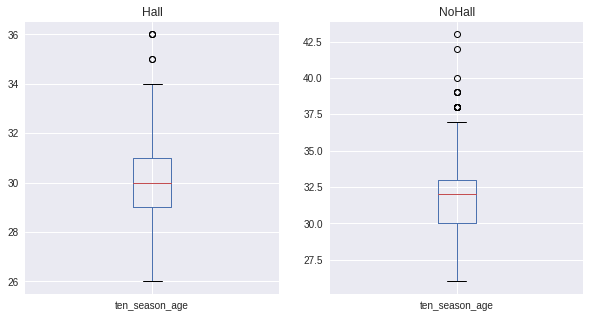

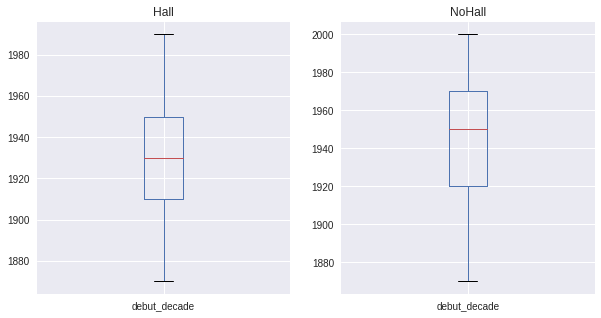

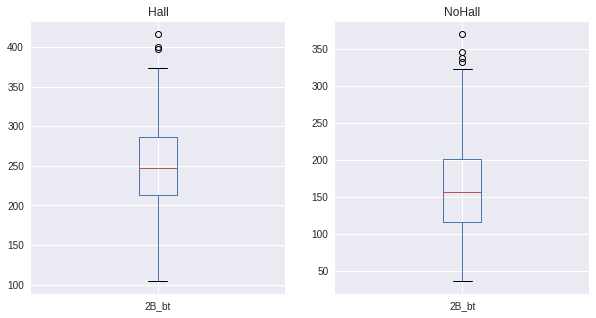

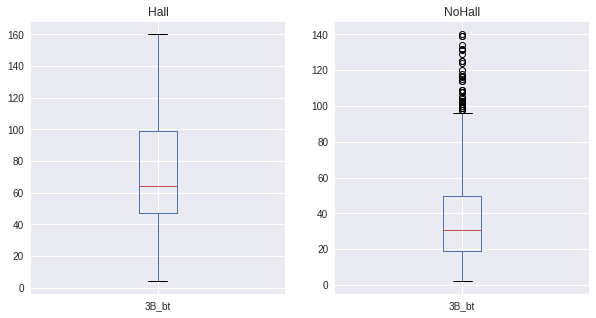

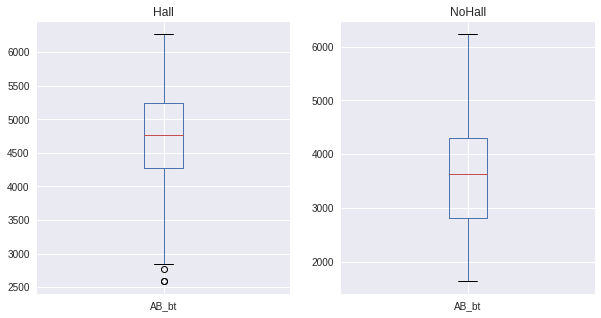

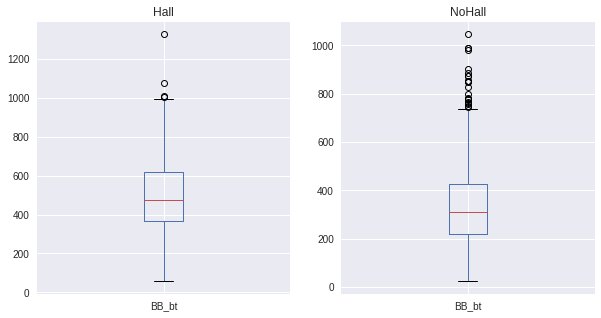

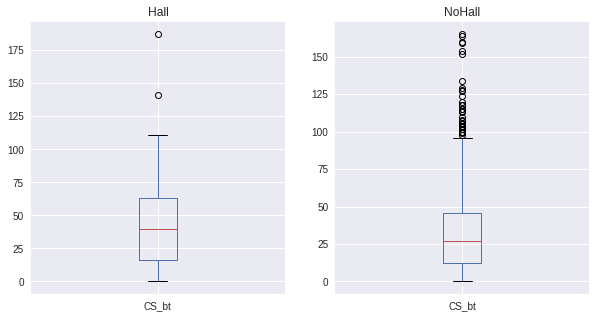

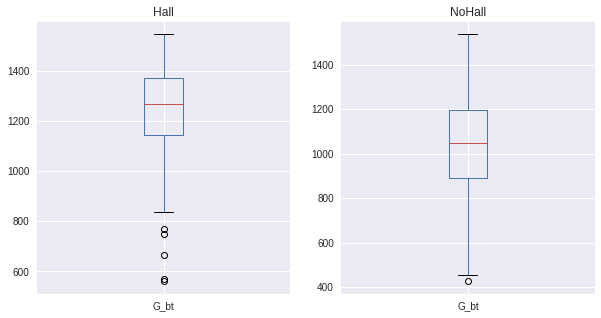

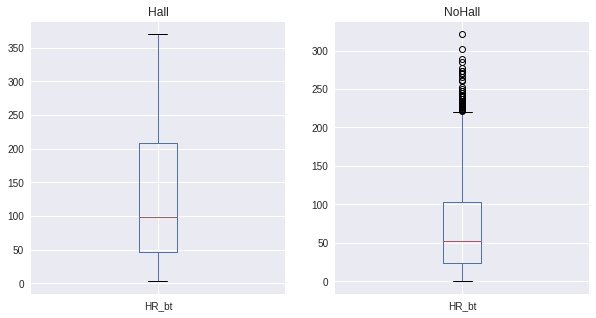

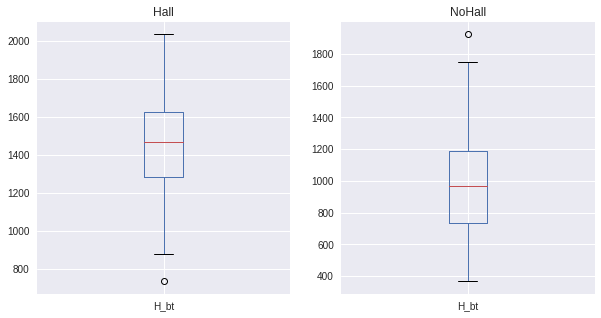

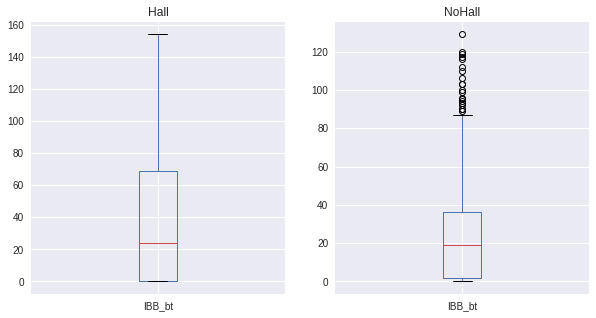

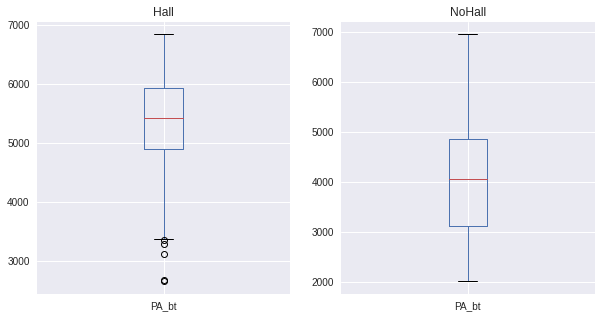

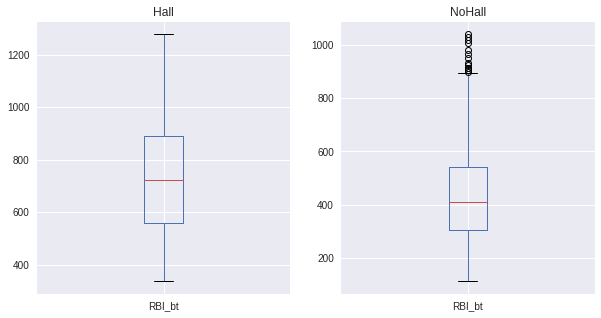

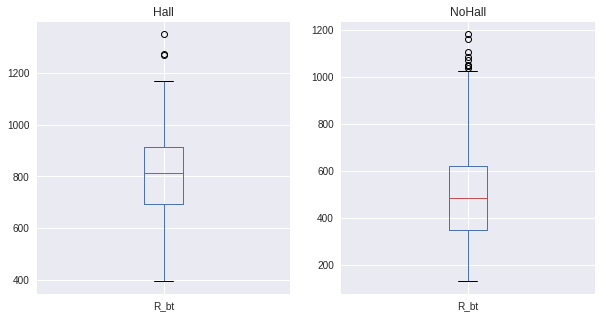

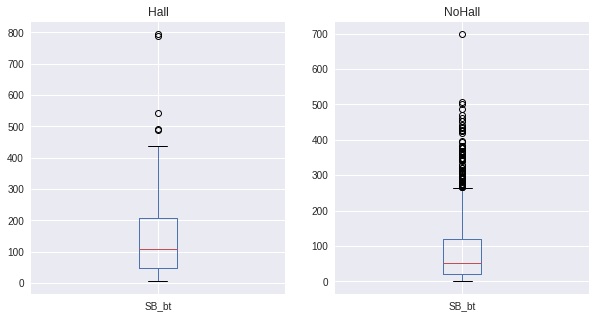

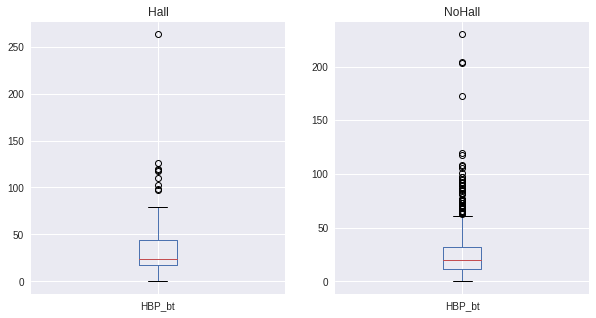

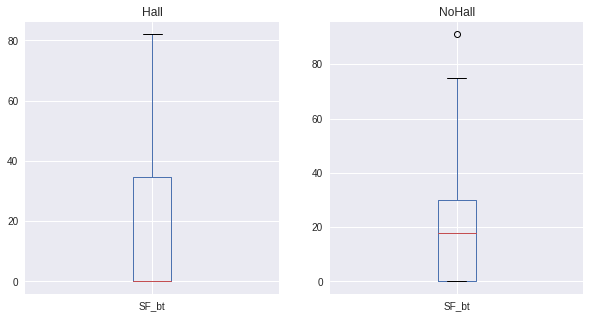

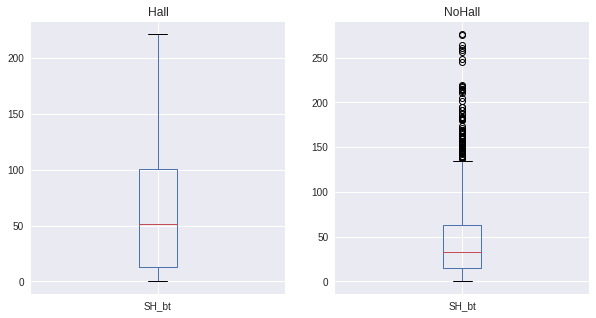

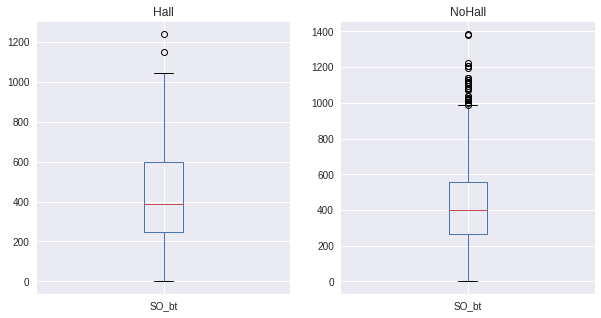

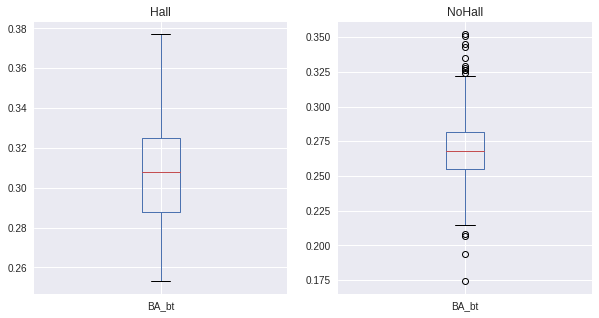

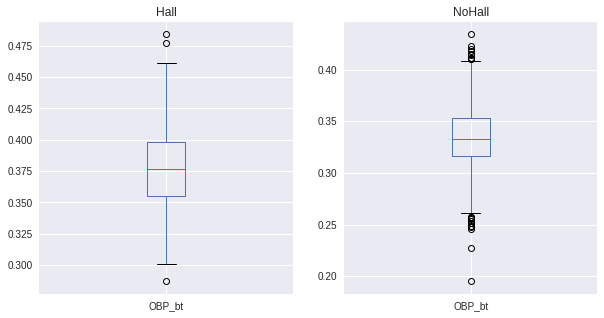

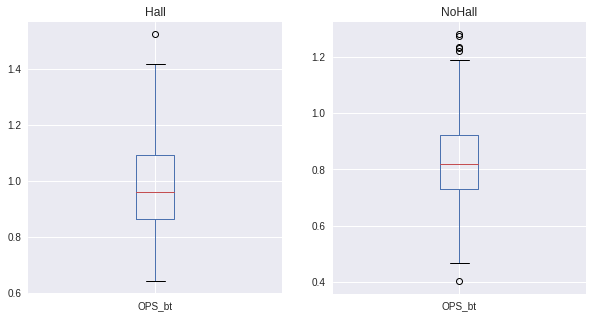

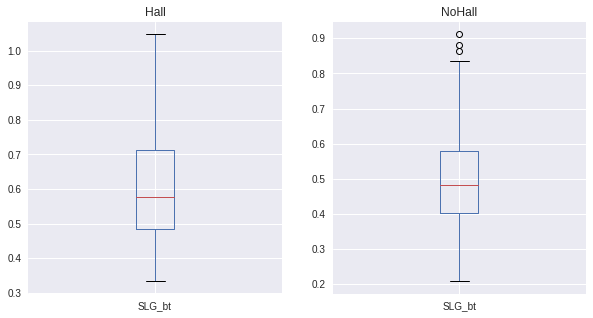

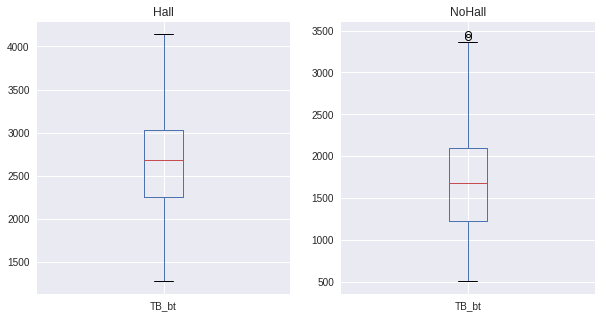

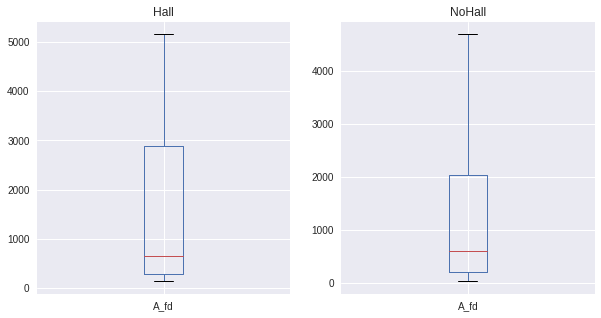

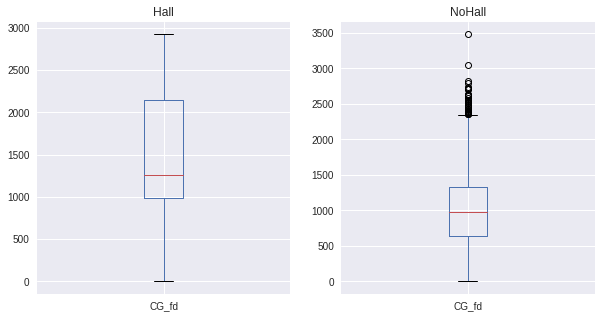

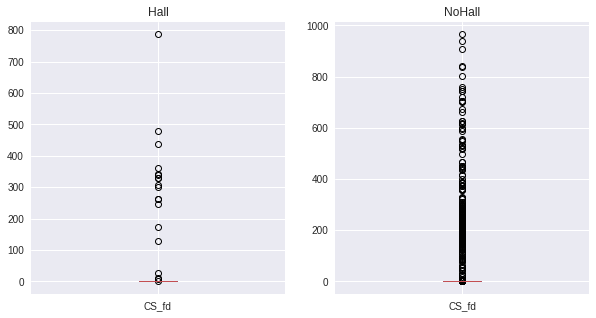

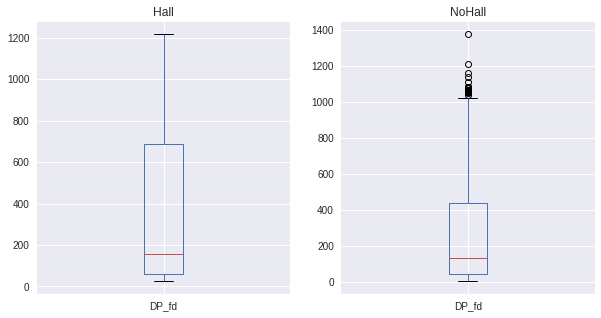

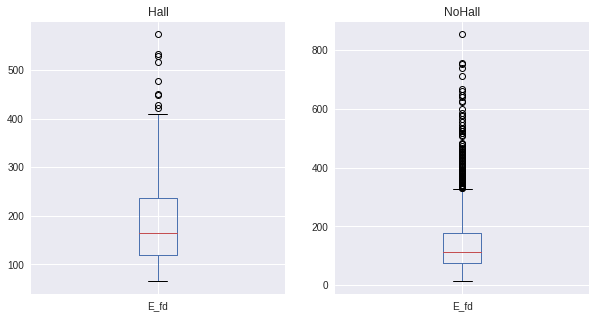

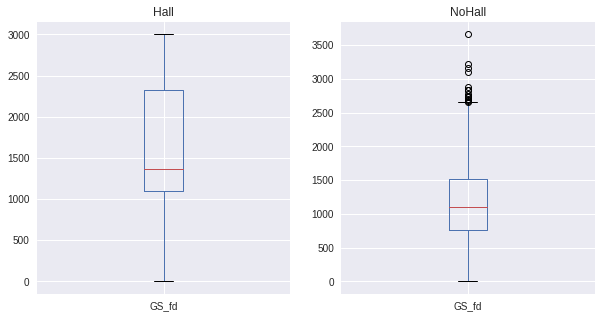

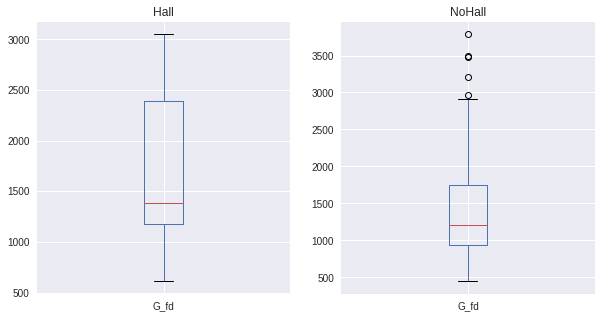

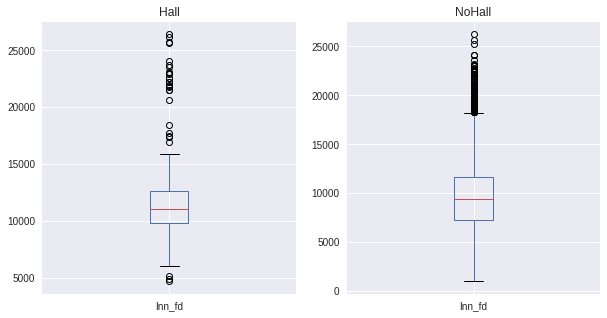

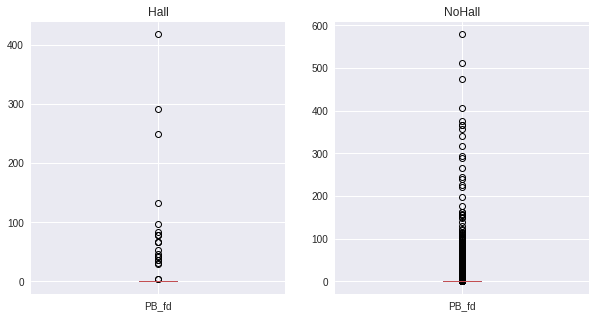

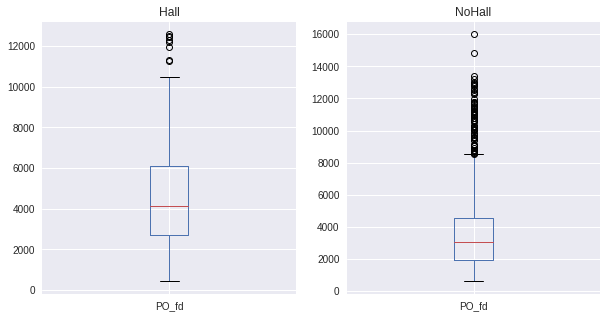

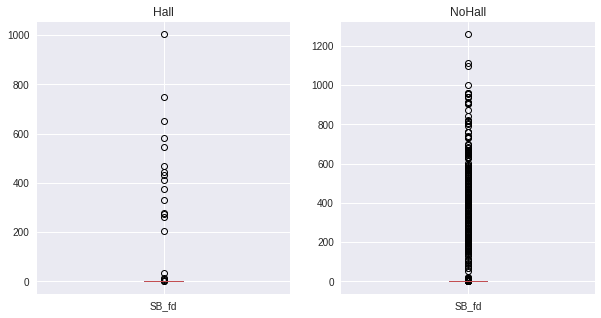

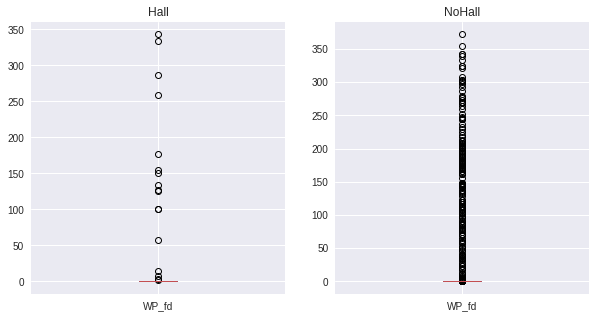

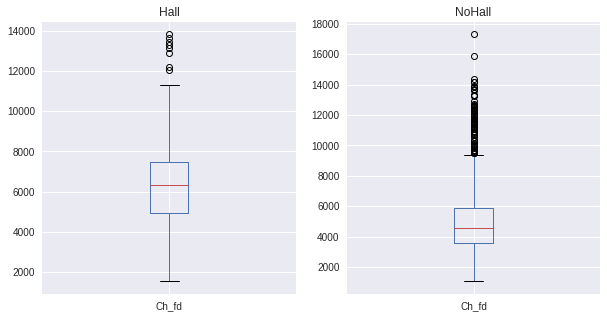

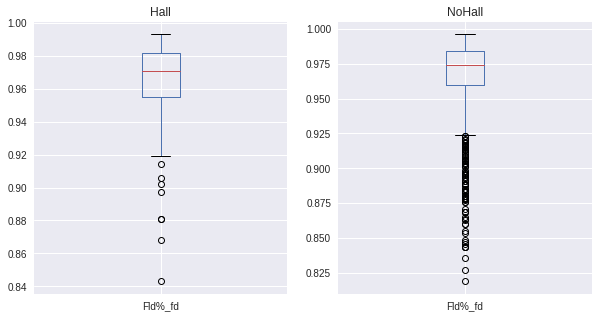

In [38]:
boxplot_per_feature(hall, no_hall, features)

In [ ]:
y_df = select_features(inactive_mayors_lg_bat_df, ['HoF'])
X_df = select_features(inactive_mayors_lg_bat_df, features)

In [ ]:
X_df.reset_index(inplace=True, drop=True)
y_df.reset_index(inplace=True, drop=True)

In [ ]:
print(X_df.index)
y_df.index

RangeIndex(start=0, stop=1565, step=1)


RangeIndex(start=0, stop=1565, step=1)

In [ ]:
print(X_df.shape)
y_df.shape

(1565, 38)


(1565, 1)

In [ ]:
y_df.value_counts()

HoF
0      1406
1       159
dtype: int64

In [193]:
round((159/1565),3)*100

10.2

In [194]:
from Models.functions.metrics import show_baseline_score
show_baseline_score(baseline=np.zeros_like(np.ravel(y)), y_val=np.ravel(y))

Accuracy: 0.8984
AUC: 0.5000


In [195]:
from Models.functions.models_performance_comparer import performance_comparer

DecisionTree Gini depth=4


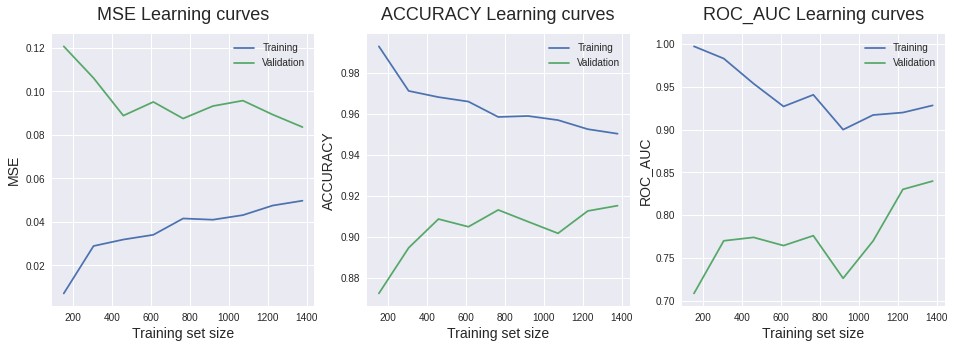

mACC:0.907
mAUC:0.775
<----------------------------------->

DecisionTree Entropy depth=4


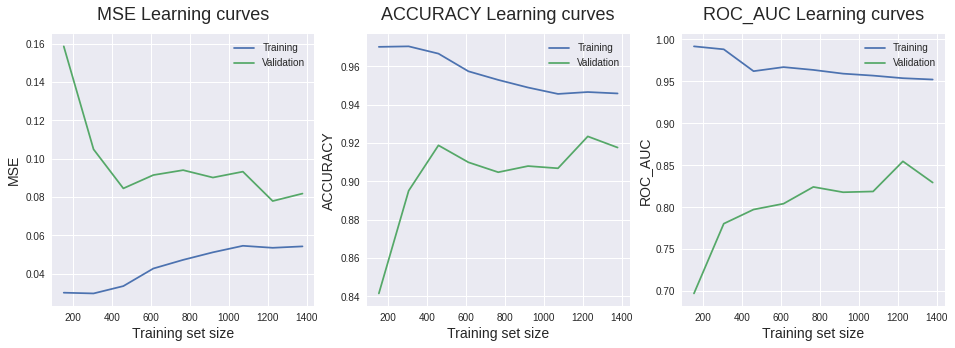

mACC:0.913
mAUC:0.83
<----------------------------------->

DecisionTree Gini depth=3


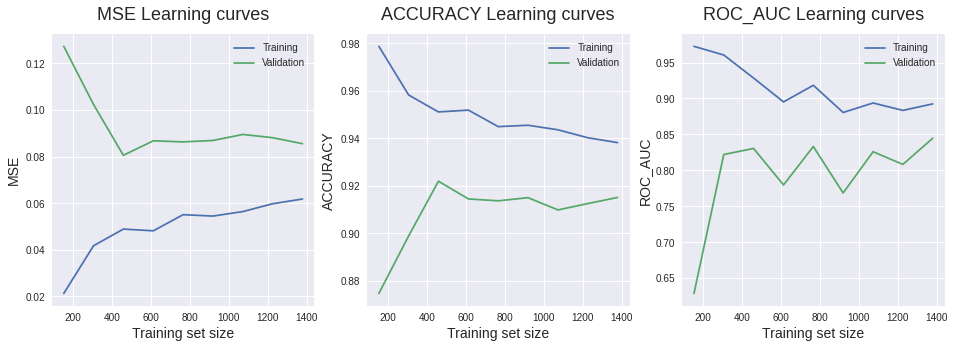

mACC:0.907
mAUC:0.775
<----------------------------------->

DecisionTree Entropy depth=3


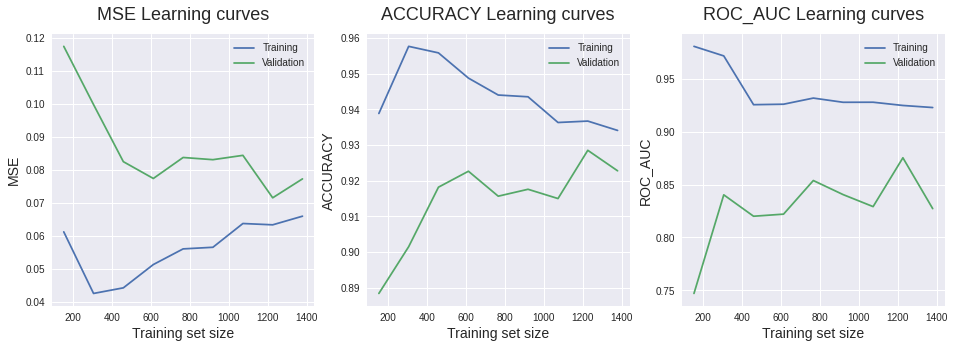

mACC:0.913
mAUC:0.83
<----------------------------------->

SVM kernel=poly


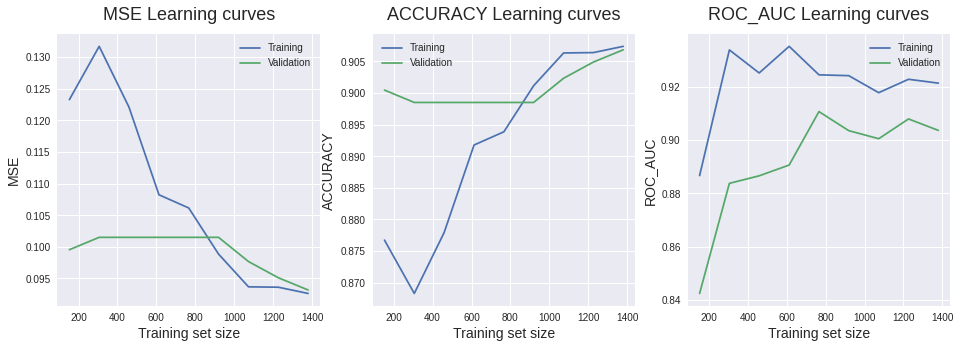

mACC:0.902
mAUC:0.904
<----------------------------------->

SVM kernel=rbf


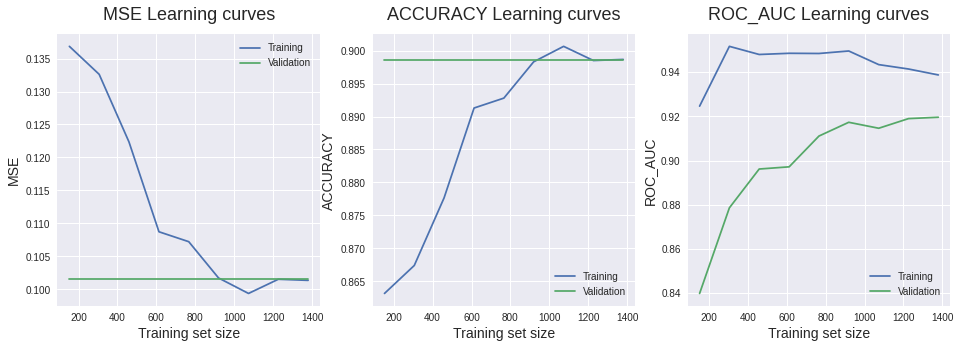

mACC:0.899
mAUC:0.917
<----------------------------------->

Random Forest estimators=10


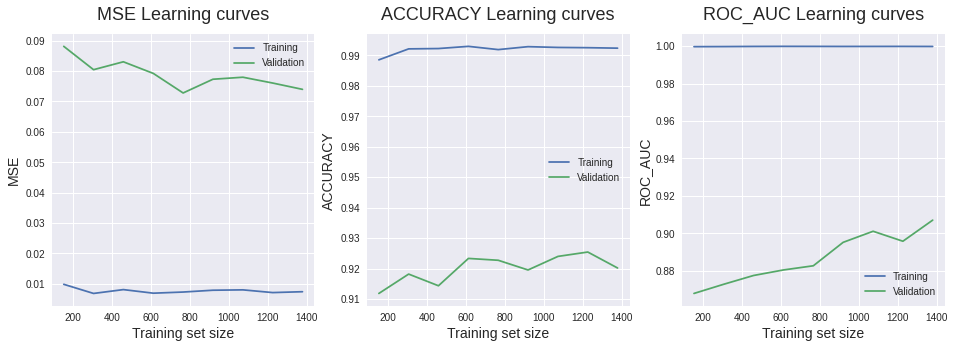

mACC:0.923
mAUC:0.897
<----------------------------------->

Random Forest estimators=5


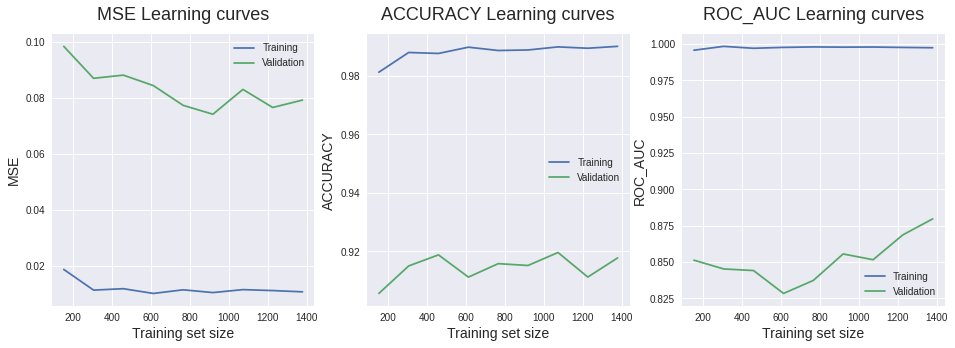

mACC:0.915
mAUC:0.859
<----------------------------------->

Naive Bayes


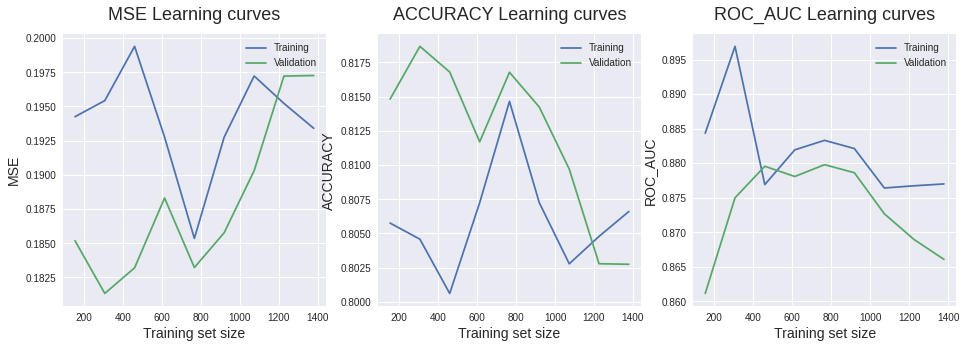

mACC:0.809
mAUC:0.873
<----------------------------------->

3NN


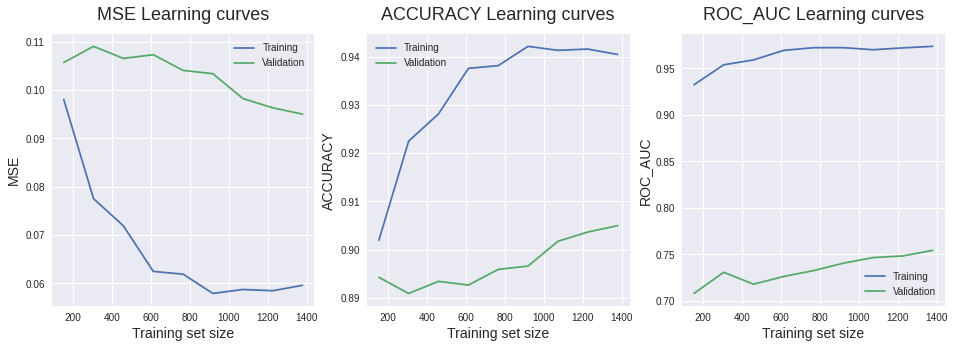

mACC:0.901
mAUC:0.745
<----------------------------------->

5NN


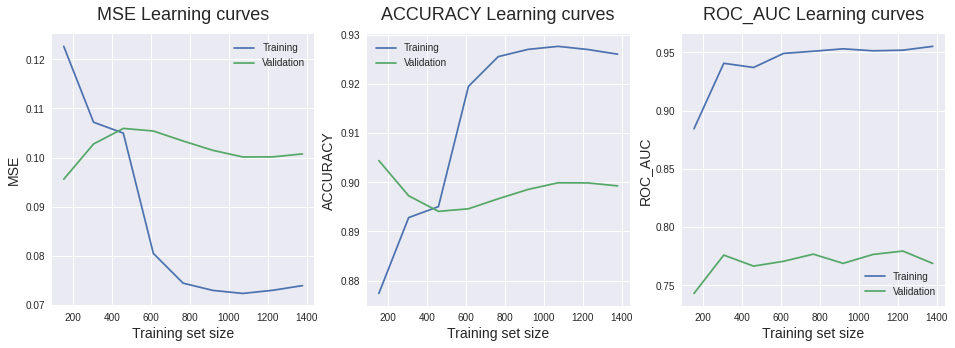

mACC:0.899
mAUC:0.775
<----------------------------------->

10NN


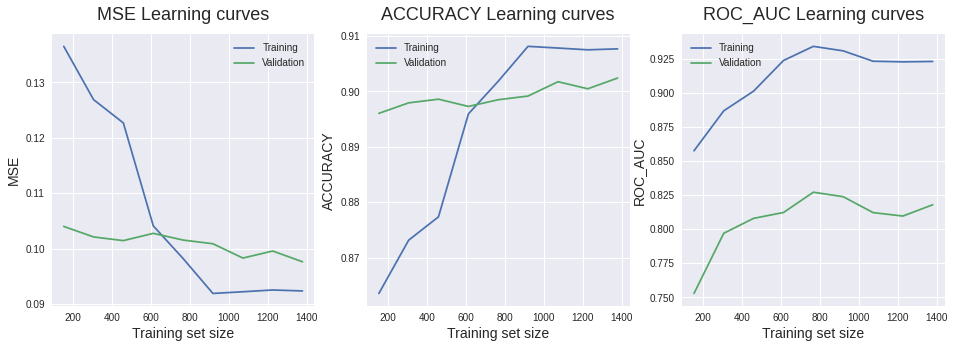

mACC:0.9
mAUC:0.815
<----------------------------------->

LogisticRegression


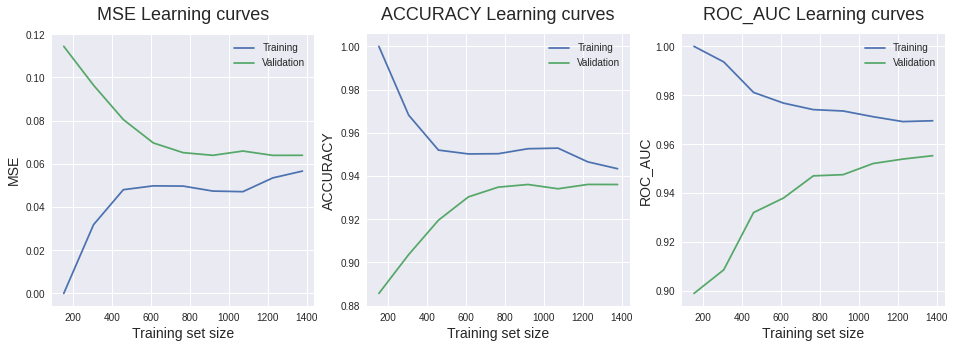

mACC:0.935
mAUC:0.951
<----------------------------------->



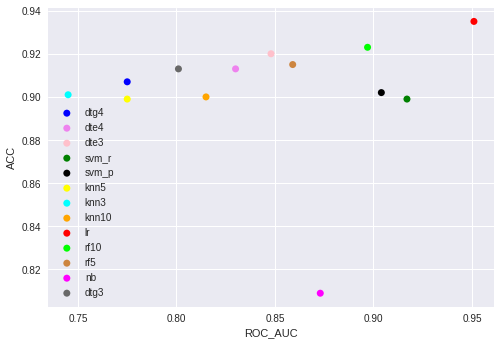

In [196]:
performance_comparer(X, y)

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [212]:
from Models.functions.feature_imp import clasifier_ft_importance_experiments, plot_feature_importance

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

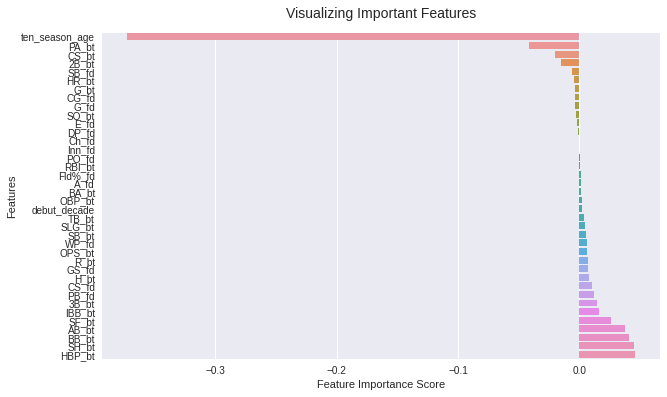

In [213]:
lr_clf = LogisticRegression(solver='liblinear', max_iter=10000)
plot_feature_importance(clasifier_ft_importance_experiments(lr_clf,X,y,True).sort_values())

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Es

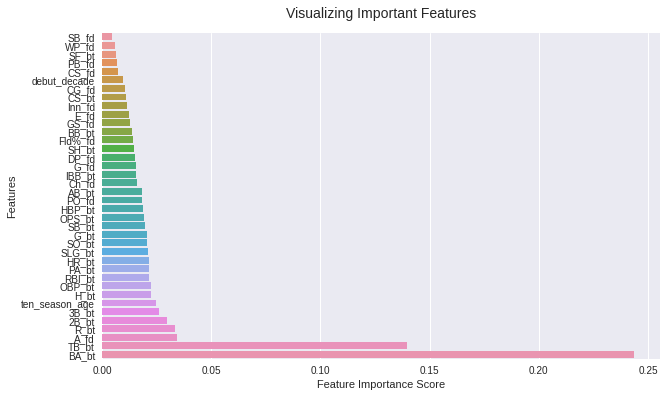

In [214]:
rf3_clf = RandomForestClassifier(n_estimators = 3, random_state = 37)
plot_feature_importance(clasifier_ft_importance_experiments(rf3_clf,X,y).sort_values())

In [215]:
df = select_features(inactive_mayors_lg_bat_df, features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF               1.000000
BA_bt             0.468905
R_bt              0.456734
TB_bt             0.449784
H_bt              0.436225
RBI_bt            0.431936
OBP_bt            0.413268
2B_bt             0.398428
3B_bt             0.389291
PA_bt             0.345443
AB_bt             0.334894
OPS_bt            0.314767
BB_bt             0.294934
G_bt              0.278177
SLG_bt            0.254996
HR_bt             0.246647
ten_season_age    0.209429
SB_bt             0.200497
Ch_fd             0.195009
IBB_bt            0.169908
CG_fd             0.165598
G_fd              0.156885
Inn_fd            0.154329
GS_fd             0.140552
debut_decade      0.140430
HBP_bt            0.136457
PO_fd             0.133915
E_fd              0.130972
SH_bt             0.102994
CS_bt             0.096885
DP_fd             0.089037
A_fd              0.083314
SB_fd             0.040955
SF_bt             0.033705
CS_fd             0.031779
WP_fd             0.025898
Fld%_fd           0.022886
P

In [216]:
m_corr = df.corr()

In [217]:
m_corr

,ten_season_age,debut_decade,2B_bt,3B_bt,AB_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,PA_bt,RBI_bt,R_bt,SB_bt,HBP_bt,SF_bt,SH_bt,SO_bt,BA_bt,OBP_bt,OPS_bt,SLG_bt,TB_bt,A_fd,CG_fd,CS_fd,DP_fd,E_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,SB_fd,WP_fd,Ch_fd,Fld%_fd,HoF
ten_season_age,1.000000,0.002443,-0.123791,-0.094926,-0.150903,-0.095016,-0.085031,-0.122570,-0.111552,-0.148599,-0.112329,-0.149280,-0.147569,-0.130100,-0.088978,-0.022316,-0.118810,-0.004231,-0.102229,-0.069625,-0.057903,-0.078760,-0.075392,-0.157579,-0.072825,-0.039766,-0.017832,-0.047813,-0.065565,-0.031394,-0.038494,-0.124039,-0.077063,-0.036961,-0.020069,-0.018872,-0.082441,0.000648,-0.209429
debut_decade,0.002443,1.000000,0.067557,-0.545878,-0.057598,0.106378,0.333595,0.150840,0.401307,-0.110339,0.494373,-0.040710,-0.026472,-0.197545,-0.228582,-0.064047,0.750144,-0.369136,0.571655,-0.210396,-0.044566,0.349488,0.411311,0.056919,-0.068282,0.233031,-0.131538,0.088672,-0.685852,0.321798,0.162122,0.259373,-0.238992,0.026066,-0.067450,0.169529,-0.043271,0.671446,-0.140430
2B_bt,-0.123791,0.067557,1.000000,0.485473,0.823368,0.573841,0.345146,0.766632,0.513014,0.874983,0.352298,0.824778,0.817401,0.789501,0.224327,0.294997,0.256817,0.118406,0.350257,0.632535,0.548561,0.555655,0.496224,0.911549,0.118716,0.530425,-0.255612,0.256353,0.113433,0.504693,0.513679,0.521338,-0.212484,0.381515,-0.254595,-0.157668,0.478055,0.124745,0.398428
3B_bt,-0.094926,-0.545878,0.485473,1.000000,0.576318,0.267685,0.187479,0.434914,-0.078132,0.652444,-0.218574,0.563626,0.441631,0.675841,0.535038,0.229480,-0.381218,0.418846,-0.152998,0.565514,0.389847,0.010919,-0.086773,0.516681,0.103541,0.254513,-0.183887,0.059268,0.487411,0.177653,0.328786,0.229071,-0.107126,0.198787,-0.220527,-0.272944,0.292987,-0.292585,0.389291
AB_bt,-0.150903,-0.057598,0.823368,0.576318,1.000000,0.607814,0.402328,0.931693,0.393260,0.962202,0.280440,0.991989,0.738522,0.862702,0.431178,0.313418,0.232408,0.276827,0.361190,0.452163,0.373692,0.285770,0.231887,0.881310,0.301226,0.545886,-0.288498,0.344607,0.293038,0.502271,0.551222,0.615359,-0.248026,0.350904,-0.303674,-0.219309,0.553709,0.013301,0.334894
BB_bt,-0.095016,0.106378,0.573841,0.267685,0.607814,1.000000,0.306282,0.668596,0.506813,0.594273,0.427248,0.697464,0.583064,0.691524,0.252101,0.235853,0.236460,0.069856,0.427740,0.297173,0.734472,0.529745,0.419232,0.656879,0.093597,0.444340,-0.208031,0.218913,0.019997,0.433142,0.426507,0.456075,-0.213070,0.297732,-0.207821,-0.122966,0.370204,0.171579,0.294934
CS_bt,-0.085031,0.333595,0.345146,0.187479,0.402328,0.306282,1.000000,0.446226,0.104444,0.381715,0.156283,0.411566,0.111695,0.320809,0.436961,0.022623,0.242204,0.187179,0.304074,0.178102,0.189570,0.080833,0.044236,0.326293,0.101329,0.544885,-0.257552,0.110591,-0.148782,0.551163,0.473704,0.472852,-0.251560,0.116795,-0.267821,-0.183528,0.172702,0.272495,0.096885
G_bt,-0.122570,0.150840,0.766632,0.434914,0.931693,0.668596,0.446226,1.000000,0.447288,0.868427,0.393025,0.942708,0.687168,0.741930,0.338609,0.293562,0.350887,0.275020,0.472981,0.327934,0.371854,0.329074,0.281914,0.827931,0.283673,0.605124,-0.284516,0.361721,0.106913,0.584840,0.593343,0.649971,-0.319618,0.361946,-0.299706,-0.179153,0.546739,0.223688,0.278177
HR_bt,-0.111552,0.401307,0.513014,-0.078132,0.393260,0.506813,0.104444,0.447288,1.000000,0.387464,0.669751,0.417606,0.749302,0.415830,-0.142085,0.143595,0.564708,-0.373772,0.717124,0.200219,0.357103,0.886898,0.924059,0.704837,-0.199530,0.421769,-0.152687,0.055229,-0.243962,0.467084,0.422225,0.501557,-0.142610,0.363210,-0.126932,0.005750,0.267343,0.322690,0.246647
H_bt,-0.148599,-0.110339,0.874983,0.652444,0.962202,0.594273,0.381715,0.868427,0.387464,1.000000,0.262023,0.955337,0.785138,0.907309,0.430866,0.319105,0.160648,0.267195,0.252282,0.667533,0.531957,0.375725,0.294535,0.917704,0.202091,0.542652,-0.291052,0.284589,0.267519,0.497898,0.556368,0.575326,-0.239644,0.376400,-0.303704,-0.225522,0.525655,0.007311,0.436225


<AxesSubplot:>

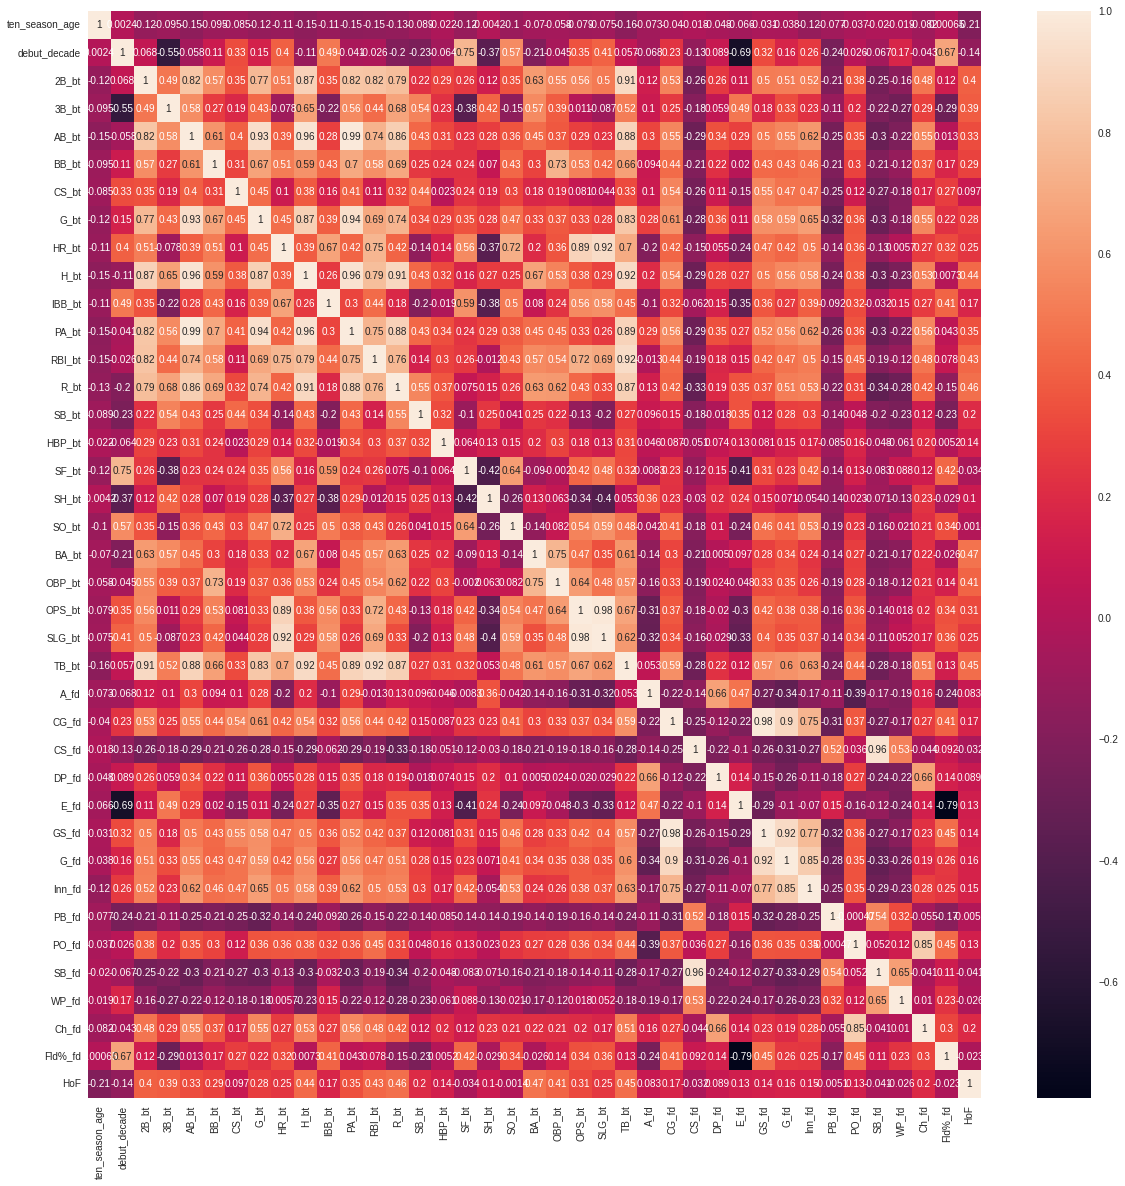

In [218]:
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,20
sns.heatmap(m_corr, annot=True)

In [219]:
features

['ten_season_age',
 'debut_decade',
 '2B_bt',
 '3B_bt',
 'AB_bt',
 'BB_bt',
 'CS_bt',
 'G_bt',
 'HR_bt',
 'H_bt',
 'IBB_bt',
 'PA_bt',
 'RBI_bt',
 'R_bt',
 'SB_bt',
 'HBP_bt',
 'SF_bt',
 'SH_bt',
 'SO_bt',
 'BA_bt',
 'OBP_bt',
 'OPS_bt',
 'SLG_bt',
 'TB_bt',
 'A_fd',
 'CG_fd',
 'CS_fd',
 'DP_fd',
 'E_fd',
 'GS_fd',
 'G_fd',
 'Inn_fd',
 'PB_fd',
 'PO_fd',
 'SB_fd',
 'WP_fd',
 'Ch_fd',
 'Fld%_fd']

In [220]:
move = ['AB_bt','CS_bt','HBP_bt','SF_bt','SH_bt', 'SO_bt','OPS_bt','TB_bt','SB_fd','WP_fd','Ch_fd','PB_fd','CG_fd','CS_fd','DP_fd','Inn_fd','A_fd','E_fd','GS_fd','G_fd','PO_fd']
reduced_features = ['ten_season_age','debut_decade','2B_bt','3B_bt','BB_bt','G_bt','HR_bt','H_bt','IBB_bt','PA_bt','RBI_bt','R_bt','SB_bt','BA_bt','OBP_bt','SLG_bt','Fld%_fd']

In [221]:
X_r = select_features(X, reduced_features)
X_r.reset_index(drop=True, inplace=True)

In [222]:
X['ten_season_age'].value_counts()

31    283
32    283
30    265
33    231
29    164
34    117
28     67
35     59
36     31
27     22
37     19
26      9
38      8
39      4
40      1
43      1
42      1
Name: ten_season_age, dtype: int64

In [223]:
df = select_features(inactive_mayors_lg_bat_df, reduced_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF               1.000000
BA_bt             0.468905
R_bt              0.456734
H_bt              0.436225
RBI_bt            0.431936
OBP_bt            0.413268
2B_bt             0.398428
3B_bt             0.389291
PA_bt             0.345443
BB_bt             0.294934
G_bt              0.278177
SLG_bt            0.254996
HR_bt             0.246647
ten_season_age    0.209429
SB_bt             0.200497
IBB_bt            0.169908
debut_decade      0.140430
Fld%_fd           0.022886
Name: HoF, dtype: float64

In [224]:
m_corr = df.corr()

<AxesSubplot:>

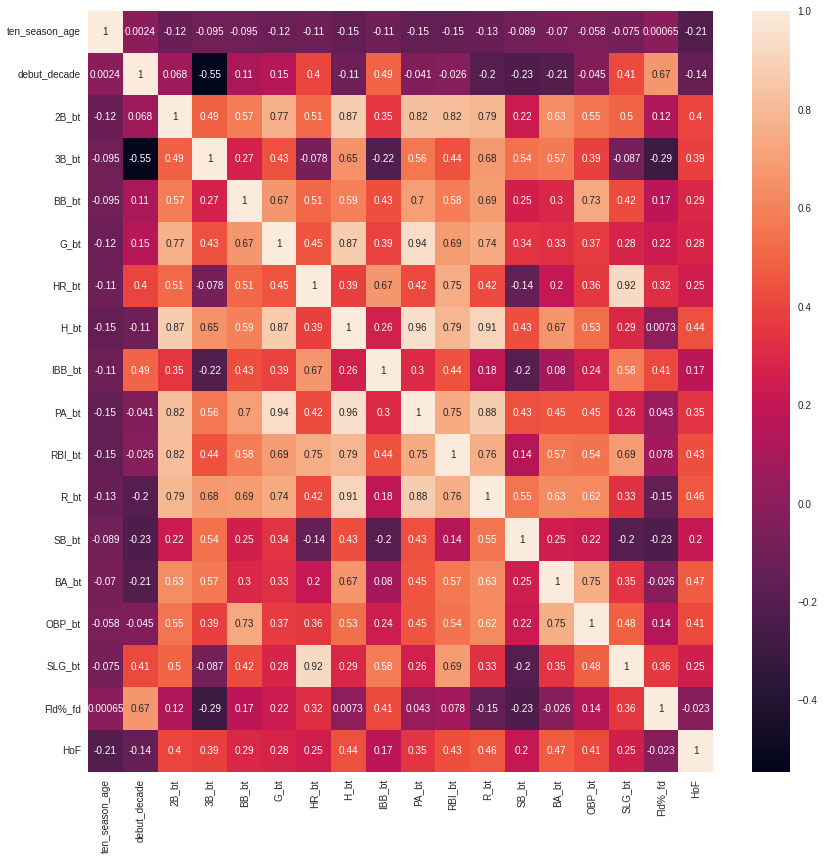

In [225]:
rcParams['figure.figsize'] = 14,14
sns.heatmap(m_corr, annot=True)

Probamos nuevamente los modelos

In [ ]:
performance_comparer(X_r, y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_t = sc.fit_transform(X_r)

In [ ]:
performance_comparer(X_t, y)

In [ ]:
#print('DecisionTree Gini depth=4')
dtg4_clf = DecisionTreeClassifier(criterion='gini', max_depth=4)

##print('DecisionTree Entropy depth=4')
dte4_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

#print('DecisionTree Gini depth=3')
dtg3_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)  

#print('DecisionTree Entropy depth=3')
dte3_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3))   

#print('SVM kernel=poly')
svmp_clf = SVC(probability=True, kernel='poly')

#print('SVM kernel=rbf')
svmr_clf = SVC(probability=True, kernel='rbf')

#print('LogisticRegression')
lr_clf = LogisticRegression(max_iter=10000, solver="liblinear")
models  = [dte4_clf, dte4_clf, dte3_clf, dtg3_clf, svmr_clf, svmp_clf, lr_clf]
models_label = ['dtg4','dte4', 'dte3', 'dtg3','svm_r','svm_p','lr']

In [ ]:
from Models.functions.models_performance_comparer import performance_comparer_plus

In [ ]:
performance_comparer_plus(X_t, y, models, models_label)

Vamos a reducir dimensiones

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca3 = PCA(n_components=3)
X_pca3_r = pca3.fit_transform(X_t)
print('explained variance ratio (for components): %s'
                        %str(pca3.explained_variance_ratio_))

In [ ]:
from Models.functions.data_set_plot import plot_2d_data, plot_3d_data
rcParams['figure.figsize'] = 8,6

In [ ]:
plot_3d_data(X_pca3_r,y.to_numpy())